In [1]:
import numpy as np
from IPython import get_ipython
from IPython.display import display, HTML, Markdown
import ipywidgets as widgets

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import networkx as nx

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.max_colwidth', 5000)


In [2]:
# import plotly for visualization

# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

import plotly.express as px

# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [3]:
df = pd.read_excel('PS1 - ES Hackathon_SampleData_AI In Capacity Management8421018.xlsx', sheet_name = 'Skill_Tree')

In [4]:
df.head()

Primary Unit  Sub Unit 1        Sub Unit 2  Sub Unit 3  \
0       Unit 1  Technology  Cloud Technology  Containers   
1       Unit 1  Technology  Cloud Technology  Containers   
2       Unit 1  Technology  Cloud Technology        PaaS   
3       Unit 1  Technology  Cloud Technology        PaaS   
4       Unit 1  Technology  Cloud Technology        PaaS   

                     Skill  
0                   Docker  
1               Kubernetes  
2      Database management  
3                   No SQL  
4  Application Development

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Primary Unit  103 non-null    object
 1   Sub Unit 1    103 non-null    object
 2   Sub Unit 2    103 non-null    object
 3   Sub Unit 3    103 non-null    object
 4   Skill         103 non-null    object
dtypes: object(5)
memory usage: 4.1+ KB


In [6]:
process_list = df['Primary Unit'].to_list()
process_list.extend(df['Sub Unit 1'].to_list())
process_list.extend(df['Sub Unit 2'].to_list())
process_list.extend(df['Sub Unit 3'].to_list())
process_list.extend(df['Skill'].to_list())

process_list = (set(process_list))
proc_list = pd.DataFrame(process_list, columns = ['process_list'])

In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()

In [8]:
proc_list.loc[:, 'process_list_encoded'] = labelencoder_X_1.fit_transform(proc_list.loc[:, 'process_list'])
proc_list = proc_list.sort_values(by = 'process_list_encoded').reset_index(drop = True)
proc_list

process_list  process_list_encoded
0                                  AWS                     0
1                   Account Management                     1
2                           Accounting                     2
3                       Administration                     3
4                       Advanced Excel                     4
5                                Agile                     5
6                          Agile Coach                     6
7                     Agile Leadership                     7
8             Agile Project Management                     8
9                             Analysis                     9
10                    Analytical Skill                    10
11                           Analytics                    11
12                             Angular                    12
13             Application Development                    13
14   Application Life Cycle Management                    14
15                        Architecture                    15
16             Artificial Intelligence                    16
17                          Assessment                    17
18       Augmented and Virtual Reality                    18
19                               Azure                    19
20                      Bid Management                    20
21                        Bid Strategy                    21
22                    Brand Management                    22
23                     Budget Analysis                    23
24                   Budget Management                    24
25       Budget Oversight and Tracking                    25
26                  Budget Preparation                    26
27                           Budgeting                    27
28                   Business Analysis                    28
29              Business Case Building                    29
30                 Business Consulting                    30
31                Business Development                    31
32               Business Intelligence                    32
33        Business Process Improvement                    33
34             Business Transformation                    34
35           Business process analysis                    35
36                              C#.net                    36
37         Capital Management analysis                    37
38                  Cash Flow analysis                    38
39                   Change Management                    39
40                     Change Strategy                    40
41                               Cloud                    41
42           Cloud Native Architecture                    42
43                    Cloud Technology                    43
44                    Cognitive Skills                    44
45                          Containers                    45
46                             Costing                    46
47                   Critical Analysis                    47
48            Critical Problem Solving                    48
49                       Data Analysis                    49
50                   Data Architecture                    50
51                  Data Visualisation                    51
52                    Data Warehousing                    52
53                 Database management                    53
54                       Deep Learning                    54
55                              Design                    55
56                              Docker                    56
57                                 ETL                    57
58             Effective Communication                    58
59                     Emerging Trends                    59
60            Enterprise Risk Analysis                    60
61               Escalation Management                    61
62                          Estimating                    62
63                           Execution                    63
64                      External Audit                    64


In [9]:
proc_list['Type'] = 'Type1'

In [10]:
df_node = proc_list[['process_list','process_list_encoded', 'Type']]
df_node.shape

(153, 3)

In [11]:
res = dict(zip(proc_list.process_list, proc_list.process_list_encoded))

In [12]:
df['primary_unit_encoded'] = df['Primary Unit'].map(res)
df['sub_unit_1_encoded'] = df['Sub Unit 1'].map(res)
df['sub_unit_2_encoded'] = df['Sub Unit 2'].map(res)
df['sub_unit_3_encoded'] = df['Sub Unit 3'].map(res)
df['skill_encoded'] = df['Skill'].map(res)

In [13]:
df_edge = df[['primary_unit_encoded','sub_unit_1_encoded','sub_unit_2_encoded','sub_unit_3_encoded','skill_encoded']]

In [14]:
#df_edge = unique_proc
df_edge.head()

primary_unit_encoded  sub_unit_1_encoded  sub_unit_2_encoded  \
0                   142                 140                  43   
1                   142                 140                  43   
2                   142                 140                  43   
3                   142                 140                  43   
4                   142                 140                  43   

   sub_unit_3_encoded  skill_encoded  
0                  45             56  
1                  45             84  
2                  97             53  
3                  97             94  
4                  97             13

In [15]:
edge1 = df_edge
node1 = df_node

In [16]:
edge1.head()

primary_unit_encoded  sub_unit_1_encoded  sub_unit_2_encoded  \
0                   142                 140                  43   
1                   142                 140                  43   
2                   142                 140                  43   
3                   142                 140                  43   
4                   142                 140                  43   

   sub_unit_3_encoded  skill_encoded  
0                  45             56  
1                  45             84  
2                  97             53  
3                  97             94  
4                  97             13

In [17]:
g = nx.from_pandas_edgelist(edge1, 'primary_unit_encoded', 'skill_encoded', ['sub_unit_1_encoded', 'sub_unit_2_encoded', 'sub_unit_3_encoded'], create_using=nx.MultiDiGraph())
nx.set_node_attributes(g, node1.set_index('process_list_encoded')['process_list'].to_dict(), 'process_list')
nx.set_node_attributes(g, node1.set_index('process_list_encoded')['Type'].to_dict(), 'Type')
pos = nx.layout.spring_layout(g)

In [18]:
df.head()

Primary Unit  Sub Unit 1        Sub Unit 2  Sub Unit 3  \
0       Unit 1  Technology  Cloud Technology  Containers   
1       Unit 1  Technology  Cloud Technology  Containers   
2       Unit 1  Technology  Cloud Technology        PaaS   
3       Unit 1  Technology  Cloud Technology        PaaS   
4       Unit 1  Technology  Cloud Technology        PaaS   

                     Skill  primary_unit_encoded  sub_unit_1_encoded  \
0                   Docker                   142                 140   
1               Kubernetes                   142                 140   
2      Database management                   142                 140   
3                   No SQL                   142                 140   
4  Application Development                   142                 140   

   sub_unit_2_encoded  sub_unit_3_encoded  skill_encoded  
0                  43                  45             56  
1                  43                  45             84  
2                  43                  97             53  
3                  43                  97             94  
4                  43                  97             13

In [19]:
#g = nx.from_pandas_edgelist(df,source = 'primary_unit_encoded', target = 'skill_encoded',edge_attr = ['sub_unit_1_encoded', 'sub_unit_2_encoded', 'sub_unit_3_encoded'],create_using=nx.DiGraph())

In [20]:
print(nx.info(g))

Name: 
Type: MultiDiGraph
Number of nodes: 108
Number of edges: 103
Average in degree:   0.9537
Average out degree:   0.9537


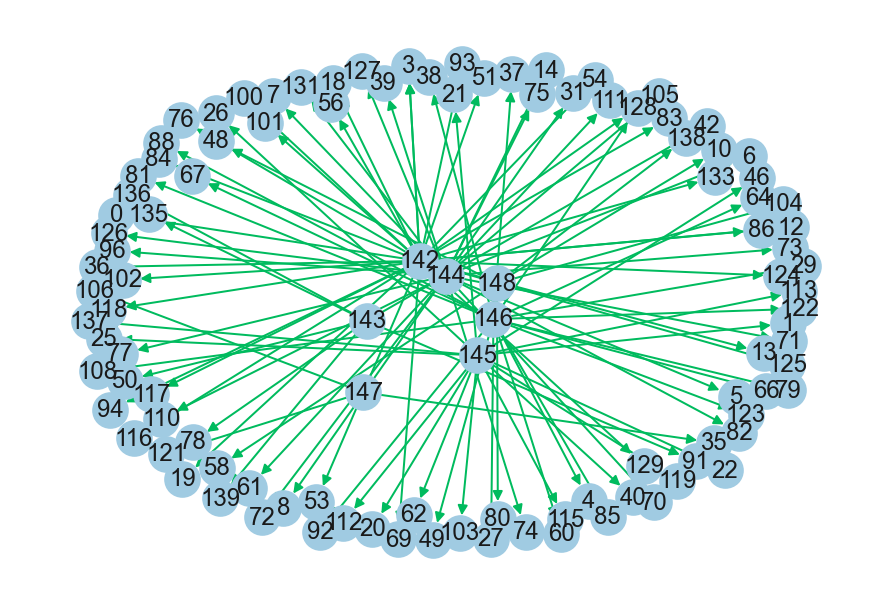

In [21]:
pos=nx.spring_layout(g)
nx.draw(g,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)


In [22]:
#No. of unique nodes
len(g.nodes)

108

In [23]:
import random
edges = dict()
for edge in g.edges:
    edges[(edge[0], edge[1])] = 1

In [24]:
print(nx.info(g))

Name: 
Type: MultiDiGraph
Number of nodes: 108
Number of edges: 103
Average in degree:   0.9537
Average out degree:   0.9537


In [25]:
import random
missing_edges = set([])
while (len(missing_edges)< len(g.nodes)):
    a=random.randint(1, len(g.edges))
    b=random.randint(1, len(g.edges))
    tmp = edges.get((a,b),-1)
    if tmp == -1 and a!=b:
        try:
            if nx.shortest_path_length(g,source=a,target=b) > 2: 
                
                missing_edges.add((a,b))
            else:
                continue  
        except:  
                missing_edges.add((a,b))              
    else:
        continue

In [26]:
len(missing_edges)

108

In [27]:
missing_edges

{(1, 16),
 (1, 40),
 (1, 75),
 (2, 23),
 (3, 103),
 (5, 85),
 (5, 103),
 (7, 15),
 (9, 5),
 (9, 67),
 (9, 90),
 (11, 12),
 (11, 53),
 (12, 13),
 (14, 59),
 (15, 58),
 (15, 89),
 (19, 16),
 (20, 4),
 (21, 41),
 (22, 28),
 (22, 47),
 (22, 74),
 (23, 27),
 (25, 80),
 (26, 99),
 (27, 46),
 (27, 56),
 (27, 103),
 (28, 31),
 (28, 76),
 (30, 19),
 (30, 55),
 (31, 43),
 (31, 96),
 (32, 53),
 (34, 80),
 (36, 53),
 (36, 66),
 (38, 30),
 (38, 70),
 (38, 79),
 (38, 83),
 (40, 18),
 (41, 29),
 (41, 38),
 (44, 65),
 (44, 86),
 (45, 16),
 (45, 22),
 (46, 8),
 (46, 62),
 (49, 1),
 (50, 5),
 (50, 21),
 (51, 72),
 (52, 22),
 (52, 47),
 (52, 87),
 (53, 18),
 (53, 66),
 (53, 88),
 (54, 49),
 (54, 94),
 (54, 96),
 (60, 46),
 (62, 29),
 (62, 46),
 (62, 91),
 (63, 6),
 (63, 20),
 (63, 62),
 (64, 24),
 (66, 26),
 (67, 34),
 (67, 86),
 (70, 2),
 (70, 23),
 (70, 94),
 (71, 25),
 (71, 50),
 (72, 31),
 (73, 35),
 (73, 91),
 (74, 89),
 (75, 40),
 (79, 65),
 (80, 43),
 (80, 98),
 (81, 86),
 (85, 26),
 (86, 7),
 (86

In [28]:
import pickle
pickle.dump(missing_edges,open('missing_edges_final.p','wb'))

In [29]:
import pickle
missing_edges = pickle.load(open('missing_edges_final.p','rb'))

In [30]:
df.head()

Primary Unit  Sub Unit 1        Sub Unit 2  Sub Unit 3  \
0       Unit 1  Technology  Cloud Technology  Containers   
1       Unit 1  Technology  Cloud Technology  Containers   
2       Unit 1  Technology  Cloud Technology        PaaS   
3       Unit 1  Technology  Cloud Technology        PaaS   
4       Unit 1  Technology  Cloud Technology        PaaS   

                     Skill  primary_unit_encoded  sub_unit_1_encoded  \
0                   Docker                   142                 140   
1               Kubernetes                   142                 140   
2      Database management                   142                 140   
3                   No SQL                   142                 140   
4  Application Development                   142                 140   

   sub_unit_2_encoded  sub_unit_3_encoded  skill_encoded  
0                  43                  45             56  
1                  43                  45             84  
2                  43                  97             53  
3                  43                  97             94  
4                  43                  97             13

In [31]:
#reading total data df
df_pos = df[['primary_unit_encoded','skill_encoded']]
df_neg = pd.DataFrame(list(missing_edges), columns=['primary_unit_encoded', 'skill_encoded'])

In [32]:
#positive links i.e graph
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   primary_unit_encoded  103 non-null    int64
 1   skill_encoded         103 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [33]:
#negative links synthesized links
df_neg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   primary_unit_encoded  108 non-null    int64
 1   skill_encoded         108 non-null    int64
dtypes: int64(2)
memory usage: 1.8 KB


In [34]:
#Trian test split 
#Spiltted data into 80-20 
#positive links and negative links seperatly because we need positive training data only for creating graph 
#and for feature generation
from sklearn.model_selection import train_test_split
X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)

In [35]:
df_train_pos = pd.DataFrame(X_train_pos)
#removing header and saving
df_train_pos.to_csv('train_data.csv',header=False,index=False)

In [36]:
#Graph from Traing data only 
g=nx.read_edgelist('train_data.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 87
Number of edges: 81
Average in degree:   0.9310
Average out degree:   0.9310


In [37]:
#Graph of total data without splitting 
G=nx.from_pandas_edgelist(df,source = 'primary_unit_encoded', target = 'skill_encoded',create_using=nx.DiGraph())
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 108
Number of edges: 102
Average in degree:   0.9444
Average out degree:   0.9444


In [38]:
###total nodes in train positive data
train_nodes_pos = set(g.nodes())
###total nodes in total data
total_nodes_pos = set(G.nodes())
###test nodes in pos data
test_nodes_pos = set(X_test_pos.values.flatten())

In [39]:
print('no of process common in train and test -- ',len(train_nodes_pos.intersection(test_nodes_pos)))
print('no of process present in train but not present in test -- ',len(train_nodes_pos - test_nodes_pos))
print('no of process present in test but not present in train -- ',len(test_nodes_pos - train_nodes_pos))

no of process common in train and test --  5
no of process present in train but not present in test --  82
no of process present in test but not present in train --  21


In [40]:
print(' % of processes not there in Train but exist in Test in total Test data are {} %'.\
                  format(len(test_nodes_pos - train_nodes_pos)/len(test_nodes_pos)*100))

 % of processes not there in Train but exist in Test in total Test data are 80.76923076923077 %


In [41]:
#final train and test data sets
df_final_train = X_train_pos.append(X_train_neg,ignore_index=True)
y_final_train = np.concatenate((y_train_pos,y_train_neg))
df_final_test = X_test_pos.append(X_test_neg,ignore_index=True)
y_final_test = np.concatenate((y_test_pos,y_test_neg))

In [42]:
df_final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   primary_unit_encoded  168 non-null    int64
 1   skill_encoded         168 non-null    int64
dtypes: int64(2)
memory usage: 2.8 KB


In [43]:
df_final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   primary_unit_encoded  43 non-null     int64
 1   skill_encoded         43 non-null     int64
dtypes: int64(2)
memory usage: 816.0 bytes


In [44]:
Adj = nx.adjacency_matrix(g,nodelist=sorted(g.nodes()))

In [45]:
Adj = Adj.asfptype()
Adj

<87x87 sparse matrix of type '<class 'numpy.float64'>'
	with 81 stored elements in Compressed Sparse Row format>

In [46]:
from scipy.sparse.linalg import svds, eigs
U, s, V = svds(Adj,k = 3)

In [47]:
print('U Shape',U.shape)
print('V Shape',V.shape)
print('s Shape',s.shape)

U Shape (87, 3)
V Shape (3, 87)
s Shape (3,)


In [48]:
del Adj
del s

In [49]:
#for followees
def jaccard_for_followees(a,b):
    try:
        if len(set(g.successors(a))) == 0  | len(set(g.successors(b))) == 0:
            return 0
        sim = (len(set(g.successors(a)).intersection(set(g.successors(b)))))/\
                                    (len(set(g.successors(a)).union(set(g.successors(b)))))
    except:
        return 0
    return sim

In [50]:
#for followers
def jaccard_for_followers(a,b):
    try:
        if len(set(g.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(g.predecessors(a)).intersection(set(g.predecessors(b)))))/\
                                 (len(set(g.predecessors(a)).union(set(g.predecessors(b)))))
        return sim
    except:
        return 0

In [51]:
#for followees
def cosine_for_followees(a,b):
    try:
        if len(set(g.successors(a))) == 0  | len(set(g.successors(b))) == 0:
            return 0
        sim = (len(set(g.successors(a)).intersection(set(g.successors(b)))))/\
                                    (math.sqrt(len(set(g.successors(a)))*len((set(g.successors(b))))))
        return sim
    except:
        return 0

In [52]:
def cosine_for_followers(a,b):
    try:
        
        if len(set(g.predecessors(a))) == 0  | len(set(g.predecessors(b))) == 0:
            return 0
        sim = (len(set(g.predecessors(a)).intersection(set(g.predecessors(b)))))/\
                                     (math.sqrt(len(set(g.predecessors(a))))*(len(set(g.predecessors(b)))))
        return sim
    except:
        return 0

In [53]:
pr = nx.pagerank(g, alpha=0.85)

In [54]:
pickle.dump(pr,open('page_rank.p','wb'))

In [55]:
pr = pickle.load(open('page_rank.p','rb'))

In [56]:
print('min',pr[min(pr, key=pr.get)])
print('max',pr[max(pr, key=pr.get)])
print('mean',float(sum(pr.values())) / len(pr))

min 0.010758488393719873
max 0.013806655524499431
mean 0.011494252873563216


In [57]:
#for imputing to nodes which are not there in Train data
mean_pr = float(sum(pr.values())) / len(pr)

### Shortest path

In [58]:
#if has direct edge then deleting that edge and calculating shortest path
def compute_shortest_path_length(a,b):
    p=-1
    try:
        if g.has_edge(a,b):
            g.remove_edge(a,b)
            p= nx.shortest_path_length(g,source=a,target=b)
            g.add_edge(a,b)
        else:
            p= nx.shortest_path_length(g,source=a,target=b)
        return p
    except:
        return -1

### cheking for same community

In [59]:
#getting weekly connected edges from graph 
wcc=list(nx.weakly_connected_components(g))
def belongs_to_same_wcc(a,b):
    index = []
    if g.has_edge(b,a):
        return 1
    if g.has_edge(a,b):
            for i in wcc:
                if a in i:
                    index= i
                    break
            if (b in index):
                g.remove_edge(a,b)
                if compute_shortest_path_length(a,b)==-1:
                    g.add_edge(a,b)
                    return 0
                else:
                    g.add_edge(a,b)
                    return 1
            else:
                return 0
    else:
            for i in wcc:
                if a in i:
                    index= i
                    break
            if(b in index):
                return 1
            else:
                return 0

### Adar index

In [60]:
#adar index
def calc_adar_in(a,b):
    sum=0
    try:
        n=list(set(g.successors(a)).intersection(set(g.successors(b))))
        if len(n)!=0:
            for i in n:
                sum=sum+(1/np.log10(len(list(g.predecessors(i)))))
            return sum
        else:
            return 0
    except:
        return 0

### does process was following back

In [61]:
def follows_back(a,b):
    if g.has_edge(b,a):
        return 1
    else:
        return 0

### Katz centrality 

In [62]:
katz = nx.katz.katz_centrality(g,alpha=0.005,beta=1)

In [63]:
print('min',katz[min(katz, key=katz.get)])
print('max',katz[max(katz, key=katz.get)])
print('mean',float(sum(katz.values())) / len(katz))

min 0.10671436394391955
max 0.10778150758335875
mean 0.10721113770710687


In [64]:
mean_katz = float(sum(katz.values())) / len(katz)

### Hits score

In [65]:
hits = nx.hits(g, max_iter=1000, tol=1e-08, nstart=None, normalized=True)
#hits = pickle.load(open('hits.p','rb'))

In [66]:
print('min',hits[0][min(hits[0], key=hits[0].get)])
print('max',hits[0][max(hits[0], key=hits[0].get)])
print('mean',float(sum(hits[0].values())) / len(hits[0]))

min 0.0
max 0.8603794953634132
mean 0.011494252873563218


In [67]:
pickle.dump(hits,open('hits.p','wb'))

### From all above scores preparing data set

In [68]:
#mapping jaccrd followers to train data
df_final_train['jaccard_followers'] = df_final_train.apply(lambda row:
                                        jaccard_for_followers(row['primary_unit_encoded'],row['skill_encoded']),axis=1)

In [69]:
#mapping jaccrd followers to test data
df_final_test['jaccard_followers'] = df_final_test.apply(lambda row:
                                        jaccard_for_followers(row['primary_unit_encoded'],row['skill_encoded']),axis=1)

In [70]:
#mapping jaccrd followees to train and test data
df_final_train['jaccard_followees'] = df_final_train.apply(lambda row:
                                        jaccard_for_followees(row['primary_unit_encoded'],row['skill_encoded']),axis=1)
df_final_test['jaccard_followees'] = df_final_test.apply(lambda row:
                                        jaccard_for_followees(row['primary_unit_encoded'],row['skill_encoded']),axis=1)

In [71]:
#calculating no of followers followees for source and destination
#calculating intersection of followers and followees for source and destination
num_followers_s=[]
num_followees_s=[]
num_followers_d=[]
num_followees_d=[]
inter_followers=[]
inter_followees=[]
for i,row in df_final_train.iterrows():
    try:
        s1=set(g.predecessors(row['primary_unit_encoded']))
        s2=set(g.successors(row['primary_unit_encoded']))
    except:
        s1 = set()
        s2 = set()
    try:
        d1=set(g.predecessors(row['skill_encoded']))
        d2=set(g.successors(row['skill_encoded']))
    except:
        d1 = set()
        d2 = set()
    num_followers_s.append(len(s1))
    num_followees_s.append(len(s2))
    
    num_followers_d.append(len(d1))
    num_followees_d.append(len(d2))
    
    inter_followers.append(len(s1.intersection(d1)))
    inter_followees.append(len(s2.intersection(d2)))

In [72]:
df_final_train['num_followers_s']=num_followers_s
df_final_train['num_followees_s']=num_followees_s
df_final_train['num_followers_d']=num_followers_d
df_final_train['num_followees_d']=num_followees_d
df_final_train['inter_followers']=inter_followers
df_final_train['inter_followees']=inter_followees

In [73]:
#For test data
#calculating no of followers followees for source and destination
#calculating intersection of followers and followees for source and destination
num_followers_s=[]
num_followees_s=[]
num_followers_d=[]
num_followees_d=[]
inter_followers=[]
inter_followees=[]
for i,row in df_final_test.iterrows():
    try:
        s1=set(g.predecessors(row['primary_unit_encoded']))
        s2=set(g.successors(row['primary_unit_encoded']))
    except:
        s1 = set()
        s2 = set()
    try:
        d1=set(g.predecessors(row['skill_encoded']))
        d2=set(g.successors(row['skill_encoded']))
    except:
        d1 = set()
        d2 = set()
    num_followers_s.append(len(s1))
    num_followees_s.append(len(s2))
    
    num_followers_d.append(len(d1))
    num_followees_d.append(len(d2))
    
    inter_followers.append(len(s1.intersection(d1)))
    inter_followees.append(len(s2.intersection(d2)))

In [74]:
#assigning
df_final_test['num_followers_s']=num_followers_s
df_final_test['num_followees_s']=num_followees_s
df_final_test['num_followers_d']=num_followers_d
df_final_test['num_followees_d']=num_followees_d
df_final_test['inter_followers']=inter_followers
df_final_test['inter_followees']=inter_followees

In [75]:
#saving to disk 
df_final_train.to_csv('df_final_train_some.csv',index=False)
df_final_test.to_csv('df_final_test_some.csv',index=False)

In [76]:
#head of df 
df_final_train.head()

primary_unit_encoded  skill_encoded  jaccard_followers  jaccard_followees  \
0                   143             50                0.0                0.0   
1                   144              8                0.0                0.0   
2                   146             79                0.0                0.0   
3                   142             36                0.0                0.0   
4                   144             39                0.0                0.0   

   num_followers_s  num_followees_s  num_followers_d  num_followees_d  \
0                0                6                1                0   
1                0               19                1                0   
2                0               14                1                0   
3                0               20                1                0   
4                0               19                1                0   

   inter_followers  inter_followees  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0

In [77]:
df_final_test.head()

primary_unit_encoded  skill_encoded  jaccard_followers  jaccard_followees  \
0                   146             67                0.0                  0   
1                   144            111                0.0                  0   
2                   144             96                0.0                  0   
3                   145             25                0.0                  0   
4                   142             94                0.0                  0   

   num_followers_s  num_followees_s  num_followers_d  num_followees_d  \
0                0               14                0                0   
1                0               19                0                0   
2                0               19                0                0   
3                0               13                0                0   
4                0               20                0                0   

   inter_followers  inter_followees  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0

In [78]:
#mapping adar index on train
df_final_train['adar_index'] = df_final_train.apply(lambda row:
                                        calc_adar_in(row['primary_unit_encoded'],row['skill_encoded']),axis=1)

#mapping adar index on test
df_final_test['adar_index'] = df_final_test.apply(lambda row:
                                        calc_adar_in(row['primary_unit_encoded'],row['skill_encoded']),axis=1)

In [79]:
#mapping followback or not on train
df_final_train['follows_back'] = df_final_train.apply(lambda row:
                                        follows_back(row['primary_unit_encoded'],row['skill_encoded']),axis=1)

#mapping followback or not on test
df_final_test['follows_back'] = df_final_test.apply(lambda row:
                                        follows_back(row['primary_unit_encoded'],row['skill_encoded']),axis=1)

In [80]:
##mapping same component of wcc or not on train
df_final_train['same_comp'] = df_final_train.apply(lambda row:
                                        belongs_to_same_wcc(row['primary_unit_encoded'],row['skill_encoded']),axis=1)

##mapping same component of wcc or not on train
df_final_test['same_comp'] = df_final_test.apply(lambda row:
                                        belongs_to_same_wcc(row['primary_unit_encoded'],row['skill_encoded']),axis=1)

In [81]:
#saving to disk beacuse above operation takes much time so at every check point saving to disk 
df_final_train.to_csv('df_final_train_some1.csv',index=False)
df_final_test.to_csv('df_final_test_some1.csv',index=False)

In [83]:
df_final_train = pd.read_csv('df_final_train_some1.csv')
df_final_test = pd.read_csv('df_final_test_some1.csv')

In [84]:
#mapping shortest path on train 
df_final_train['shortest_path'] = df_final_train.apply(lambda row:
                                        compute_shortest_path_length(row['primary_unit_encoded'],row['skill_encoded']),axis=1)

#mapping shortest path on test
df_final_test['shortest_path'] = df_final_test.apply(lambda row:
                                        compute_shortest_path_length(row['primary_unit_encoded'],row['skill_encoded']),axis=1)


In [85]:
df_final_train.to_csv('df_final_train_some2.csv',index=False)
df_final_test.to_csv('df_final_test_some2.csv',index=False)

In [86]:
#page rank for source and destination in Train
#if anything not there in train graph then adding mean page rank 
df_final_train['page_rank_s'] = df_final_train.primary_unit_encoded.apply(lambda x:pr.get(x,mean_pr))
df_final_train['page_rank_d'] = df_final_train.skill_encoded.apply(lambda x:pr.get(x,mean_pr))

In [87]:
#page rank for source and destination in Test
#if anything not there in train graph then adding mean page rank 
df_final_test['page_rank_s'] = df_final_test.primary_unit_encoded.apply(lambda x:pr.get(x,mean_pr))
df_final_test['page_rank_d'] = df_final_test.skill_encoded.apply(lambda x:pr.get(x,mean_pr))

In [88]:
#Katz centrality score for source and destination in Train and test
#if anything not there in train graph then adding mean katz score
df_final_train['katz_s'] = df_final_train.primary_unit_encoded.apply(lambda x: katz.get(x,mean_katz))
df_final_train['katz_d'] = df_final_train.skill_encoded.apply(lambda x: katz.get(x,mean_katz))
df_final_test['katz_s'] = df_final_test.primary_unit_encoded.apply(lambda x: katz.get(x,mean_katz))
df_final_test['katz_d'] = df_final_test.skill_encoded.apply(lambda x: katz.get(x,mean_katz))

In [89]:
#Hits algorithm score for source and destination in Train 
#if anything not there in train graph then adding 0
df_final_train['hubs_s'] = df_final_train.primary_unit_encoded.apply(lambda x: hits[0].get(x,0))
df_final_train['hubs_d'] = df_final_train.skill_encoded.apply(lambda x: hits[0].get(x,0))
df_final_train['authorities_s'] = df_final_train.primary_unit_encoded.apply(lambda x: hits[1].get(x,0))
df_final_train['authorities_d'] = df_final_train.skill_encoded.apply(lambda x: hits[1].get(x,0))

In [90]:
#Hits algorithm score for source and destination in Test 
#if anything not there in train graph then adding 0
df_final_test['hubs_s'] = df_final_test.primary_unit_encoded.apply(lambda x: hits[0].get(x,0))
df_final_test['hubs_d'] = df_final_test.skill_encoded.apply(lambda x: hits[0].get(x,0))
df_final_test['authorities_s'] = df_final_test.primary_unit_encoded.apply(lambda x: hits[1].get(x,0))
df_final_test['authorities_d'] = df_final_test.skill_encoded.apply(lambda x: hits[1].get(x,0))

In [91]:
#dependent varible i.e link exist or not
df_final_train['indicator_link'] = y_final_train
df_final_test['indicator_link'] = y_final_test

In [92]:
df_final_train.to_csv('train_df.csv',index=False)
df_final_test.to_csv('test_df.csv',index=False)

In [93]:
df_final_train = pd.read_csv('train_df.csv')
df_final_test = pd.read_csv('test_df.csv')

### Adding SVD Features:

In [94]:
#for svd features to get feature vector creating a dict node val and inex in svd vector
sadj_col = sorted(g.nodes())
sadj_dict = { val:idx for idx,val in enumerate(sadj_col)}
del sadj_col

In [95]:
##creating two df for U valuesfor train and test data with two columns source and destination 
#and each column will have a list of 6 svd features
train_df_svd_u = pd.DataFrame()
test_df_svd_u = pd.DataFrame()
def svd_s(x):
    try:
        z = sadj_dict[x]
        return U[z]
    except:
        return [0,0,0]
train_df_svd_u['features_s'] = df_final_train.primary_unit_encoded.apply(lambda x: svd_s(x))
train_df_svd_u['features_d'] = df_final_train.skill_encoded.apply(lambda x: svd_s(x))
test_df_svd_u['features_s'] = df_final_test.primary_unit_encoded.apply(lambda x: svd_s(x))
test_df_svd_u['features_d'] = df_final_test.skill_encoded.apply(lambda x: svd_s(x))

In [96]:
##creating two df for V valuesfor train and test data with two columns source and destination 
#and each column will have a list of 6 svd features
train_df_svd_v = pd.DataFrame()
test_df_svd_v = pd.DataFrame()
def svd_v(x):
    try:
        z = sadj_dict[x]
        return V.T[z]
    except:
        return [0,0,0]
    
train_df_svd_v['features_s'] = df_final_train.primary_unit_encoded.apply(lambda x: svd_v(x))
train_df_svd_v['features_d'] = df_final_train.skill_encoded.apply(lambda x: svd_v(x))
test_df_svd_v['features_s'] = df_final_test.primary_unit_encoded.apply(lambda x: svd_v(x))
test_df_svd_v['features_d'] = df_final_test.skill_encoded.apply(lambda x: svd_v(x))

In [97]:
train_df_svd_u.index = df_final_train.index
train_df_svd_v.index = df_final_train.index
test_df_svd_u.index = df_final_test.index
test_df_svd_v.index = df_final_test.index

In [98]:
#Splitting those each one column into 6 features 
#https://stackoverflow.com/questions/35491274/pandas-split-column-of-lists-into-multiple-columns
df_final_train[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3']] = \
                            pd.DataFrame(train_df_svd_u.features_s.values.tolist(), index= df_final_train.index)
df_final_test[['svd_u_s_1', 'svd_u_s_2','svd_u_s_3']] = \
                            pd.DataFrame(test_df_svd_u.features_s.values.tolist(), index= df_final_test.index)
df_final_train[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3']] = \
                            pd.DataFrame(train_df_svd_u.features_d.values.tolist(), index= df_final_train.index)
df_final_test[['svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3']] = \
                            pd.DataFrame(test_df_svd_u.features_d.values.tolist(), index= df_final_test.index)

In [99]:
del train_df_svd_u
del test_df_svd_u

In [100]:
#Splitting those each one column into 6 features 
#https://stackoverflow.com/questions/35491274/pandas-split-column-of-lists-into-multiple-columns
df_final_train[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3']] = \
                            pd.DataFrame(train_df_svd_v.features_s.values.tolist(), index= df_final_train.index)
df_final_test[['svd_v_s_1','svd_v_s_2', 'svd_v_s_3']] = \
                            pd.DataFrame(test_df_svd_v.features_s.values.tolist(), index= df_final_test.index)
df_final_train[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3']] = \
                            pd.DataFrame(train_df_svd_v.features_d.values.tolist(), index= df_final_train.index)
df_final_test[['svd_v_d_1', 'svd_v_d_2', 'svd_v_d_3']] = \
                            pd.DataFrame(test_df_svd_v.features_d.values.tolist(), index= df_final_test.index)

In [101]:
del train_df_svd_v
del test_df_svd_v
del U
del V
del sadj_dict

In [102]:
#data frame
df_final_train.columns

Index(['primary_unit_encoded', 'skill_encoded', 'jaccard_followers',
       'jaccard_followees', 'num_followers_s', 'num_followees_s',
       'num_followers_d', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'page_rank_s', 'page_rank_d', 'katz_s', 'katz_d',
       'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d', 'indicator_link',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_d_1', 'svd_u_d_2',
       'svd_u_d_3', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3'],
      dtype='object')

In [103]:
df_final_train.to_csv('train_df_final.csv',index=False)
df_final_test.to_csv('test_df_final.csv',index=False)

In [104]:
df_final_train = pd.read_csv('train_df_final.csv')
df_final_test = pd.read_csv('test_df_final.csv')

In [105]:
df_final_train.columns

Index(['primary_unit_encoded', 'skill_encoded', 'jaccard_followers',
       'jaccard_followees', 'num_followers_s', 'num_followees_s',
       'num_followers_d', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'page_rank_s', 'page_rank_d', 'katz_s', 'katz_d',
       'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d', 'indicator_link',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_d_1', 'svd_u_d_2',
       'svd_u_d_3', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3'],
      dtype='object')

In [107]:
#dependent varible
y_train = df_final_train.indicator_link 
y_test = df_final_test.indicator_link

In [108]:
#dropping some columns
df_final_train.drop(['primary_unit_encoded', 'skill_encoded','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['primary_unit_encoded', 'skill_encoded','indicator_link'],axis=1,inplace=True)

In [109]:
df_final_train.columns

Index(['jaccard_followers', 'jaccard_followees', 'num_followers_s',
       'num_followees_s', 'num_followers_d', 'num_followees_d',
       'inter_followers', 'inter_followees', 'adar_index', 'follows_back',
       'same_comp', 'shortest_path', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_d_1', 'svd_u_d_2',
       'svd_u_d_3', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3'],
      dtype='object')

In [110]:
df_final_test.columns

Index(['jaccard_followers', 'jaccard_followees', 'num_followers_s',
       'num_followees_s', 'num_followers_d', 'num_followees_d',
       'inter_followers', 'inter_followees', 'adar_index', 'follows_back',
       'same_comp', 'shortest_path', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_d_1', 'svd_u_d_2',
       'svd_u_d_3', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3'],
      dtype='object')

In [111]:
print('Train Shape',df_final_train.shape)
print('Test Shape',df_final_test.shape)

Train Shape (168, 32)
Test Shape (43, 32)


In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

Estimators =  2 Train Score 0.6559999999999999 test Score 0.65625
Estimators =  4 Train Score 0.0 test Score 0.0
Estimators =  8 Train Score 0.0 test Score 0.0
Estimators =  16 Train Score 0.0 test Score 0.0
Estimators =  32 Train Score 0.0 test Score 0.0


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

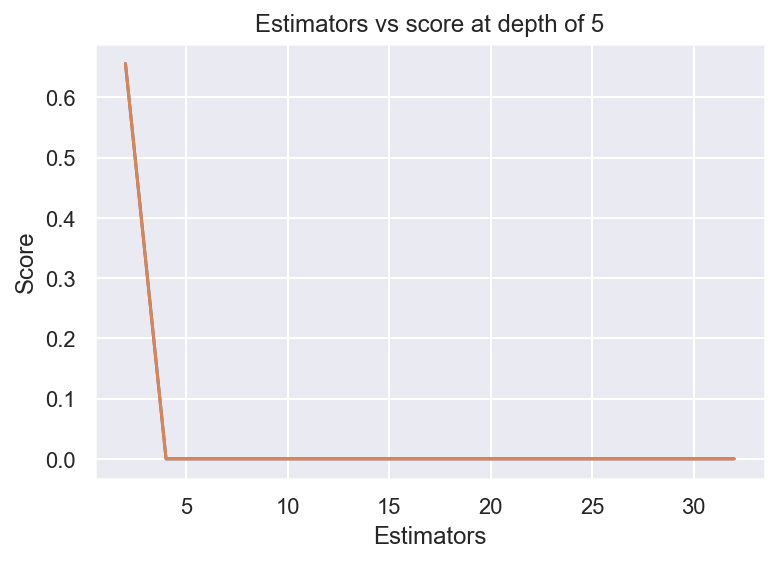

In [113]:
estimators = [2,4,8,16,32]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  2 Train Score 0.0 test Score 0.0
depth =  3 Train Score 0.0 test Score 0.0
depth =  5 Train Score 0.0 test Score 0.0


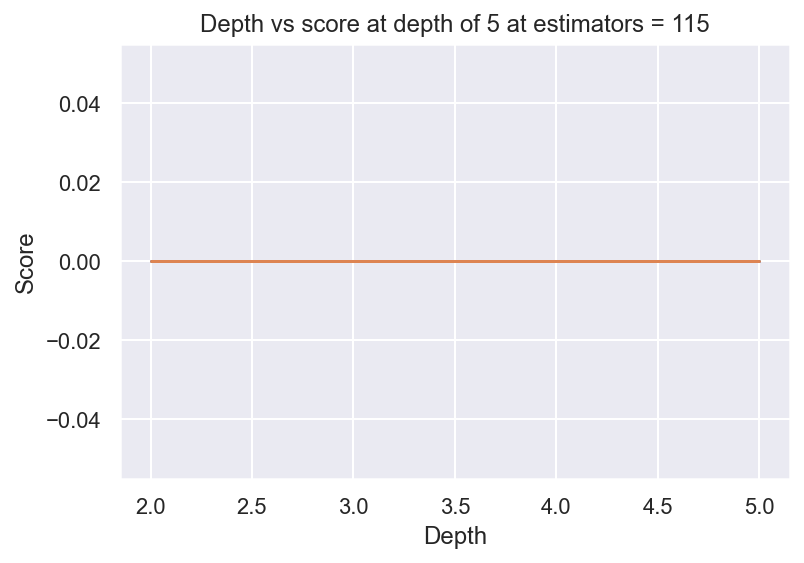

In [114]:
depths = [2,3,5]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [115]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(1,5),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023207DE1580>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023207C5AE20>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023209C32E20>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023209A23850>},
                   random_state=25, scoring='f1')

In [116]:
import pickle
pickle.dump(rf_random,open('rf_random_2.p','wb'))

In [117]:
rf_random.cv_results_

{'mean_fit_time': array([0.34020495, 0.13910203, 0.12869625, 0.134304  , 0.1418153 ]),
 'std_fit_time': array([0.65232245, 0.00966737, 0.00863256, 0.00691187, 0.02686916]),
 'mean_score_time': array([0.02119286, 0.02069726, 0.02040005, 0.02168911, 0.02328465]),
 'std_score_time': array([0.00244147, 0.0017907 , 0.00111352, 0.00214723, 0.00300928]),
 'param_max_depth': masked_array(data=[1, 3, 2, 4, 1],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[51, 33, 56, 28, 28],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[125, 138, 179, 165, 111],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[117, 109, 106, 108, 121],
              mask=[False, False, False, False, False],
       

In [118]:
print('mean test scores',rf_random.cv_results_['mean_test_score'])
#print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0. 0. 0. 0. 0.]


In [119]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)
clf.fit(df_final_train,y_train)

import pickle
pickle.dump(clf,open('clf_rf.p','wb'))

In [120]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


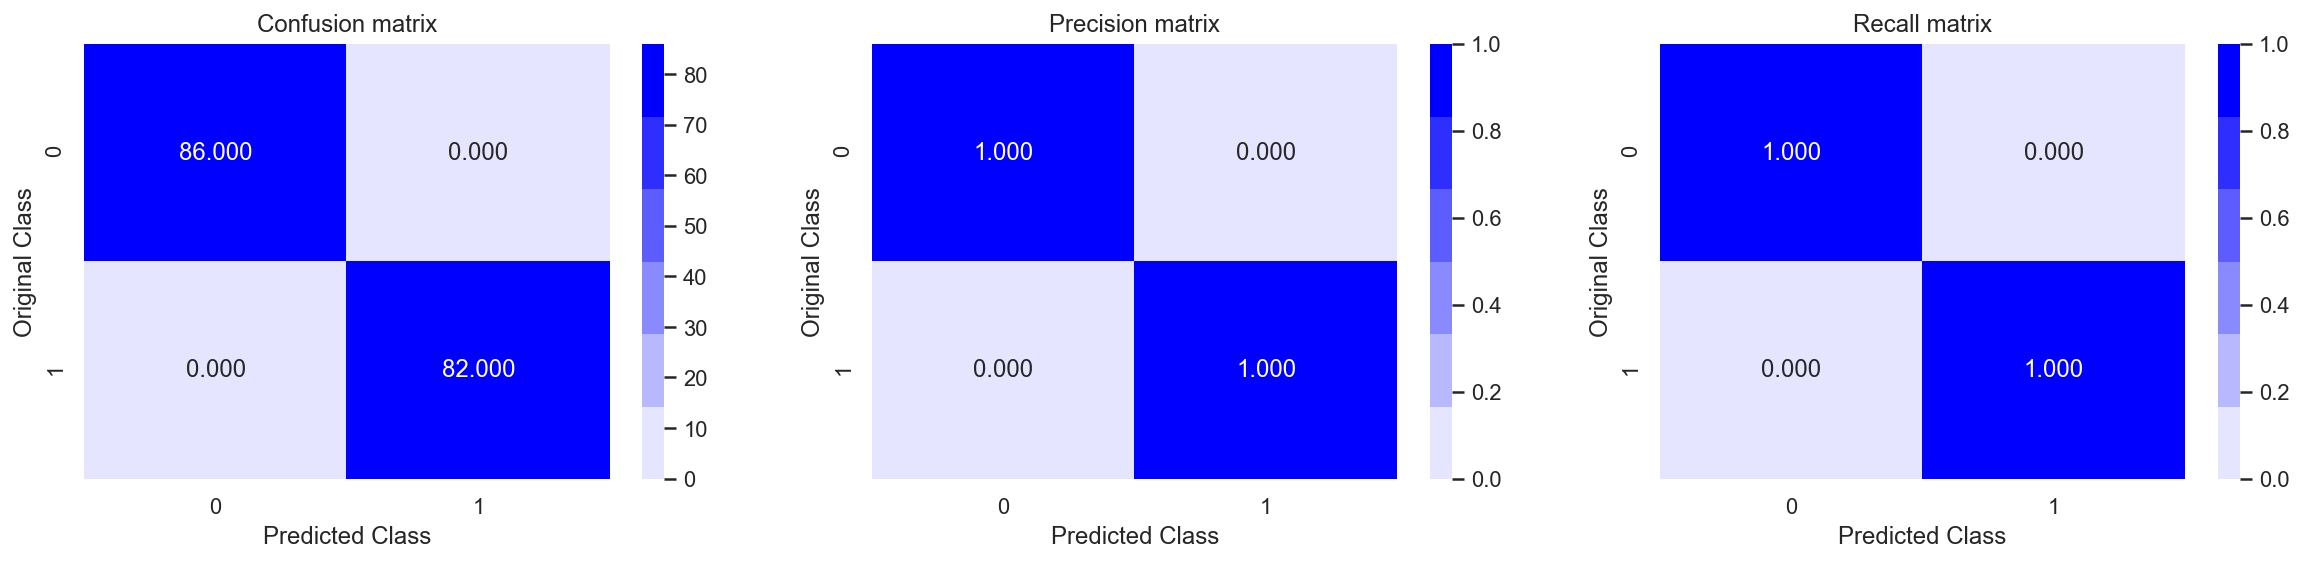

Test confusion_matrix


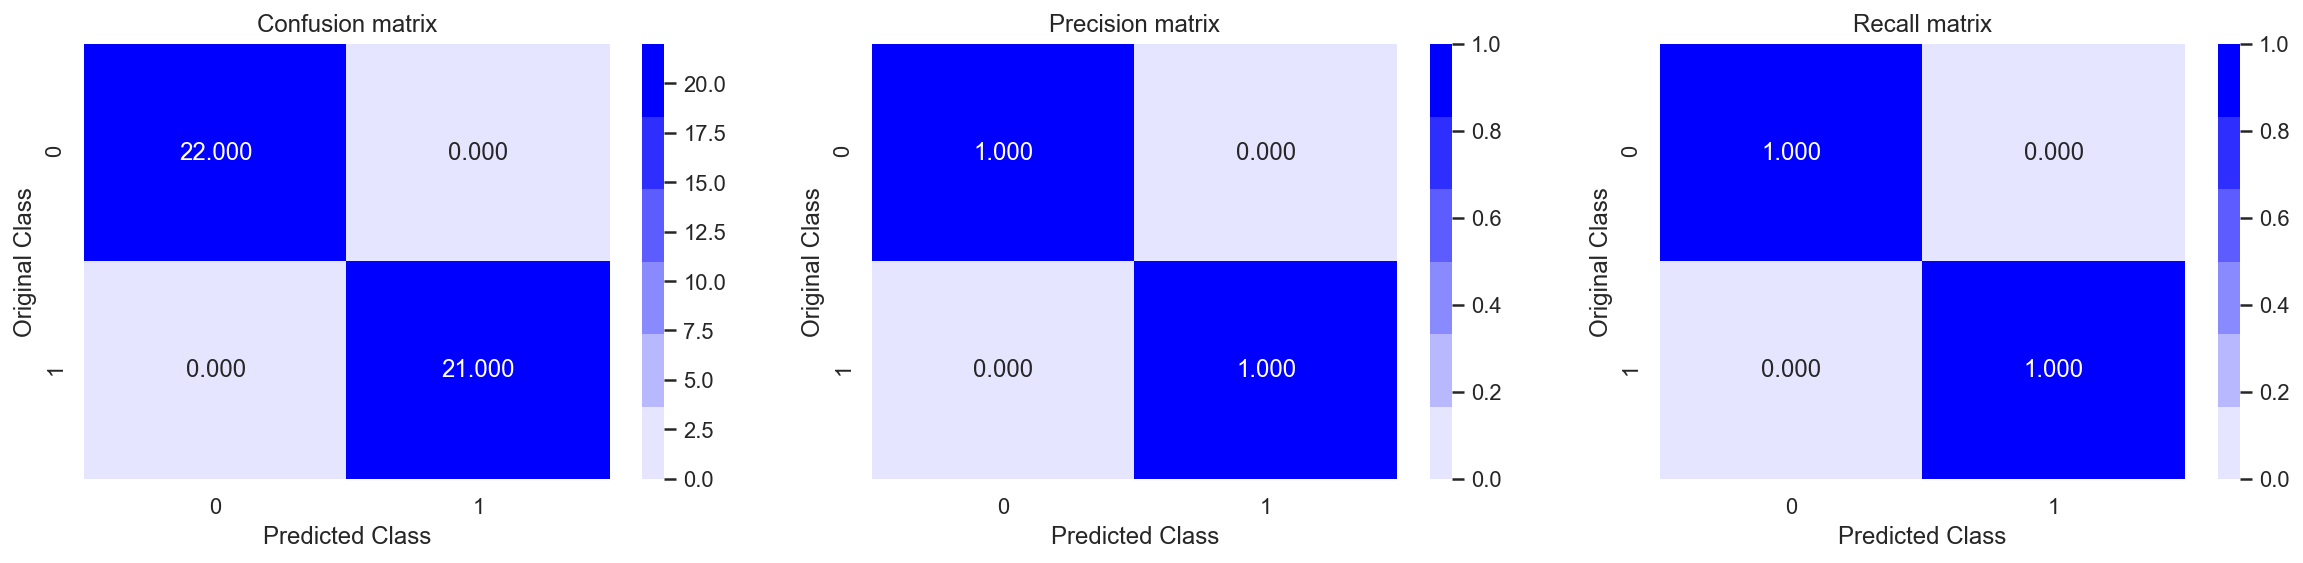

In [121]:
y_pred_train = clf.predict(df_final_train)
y_pred_test = clf.predict(df_final_test)
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_pred_train)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_pred_test)

In [122]:
print('Train f1 score',f1_score(y_train,y_pred_train))
print('Test f1 score',f1_score(y_test,y_pred_test))

Train f1 score 1.0
Test f1 score 1.0


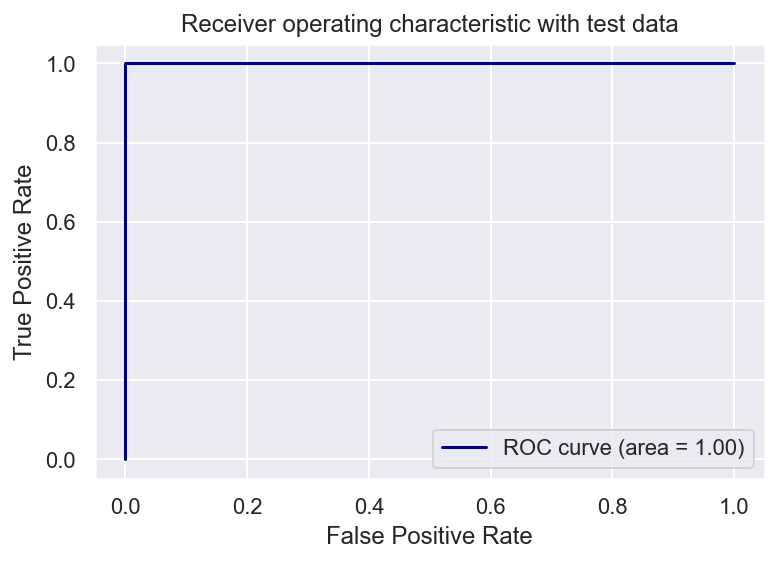

In [123]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_pred_test)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

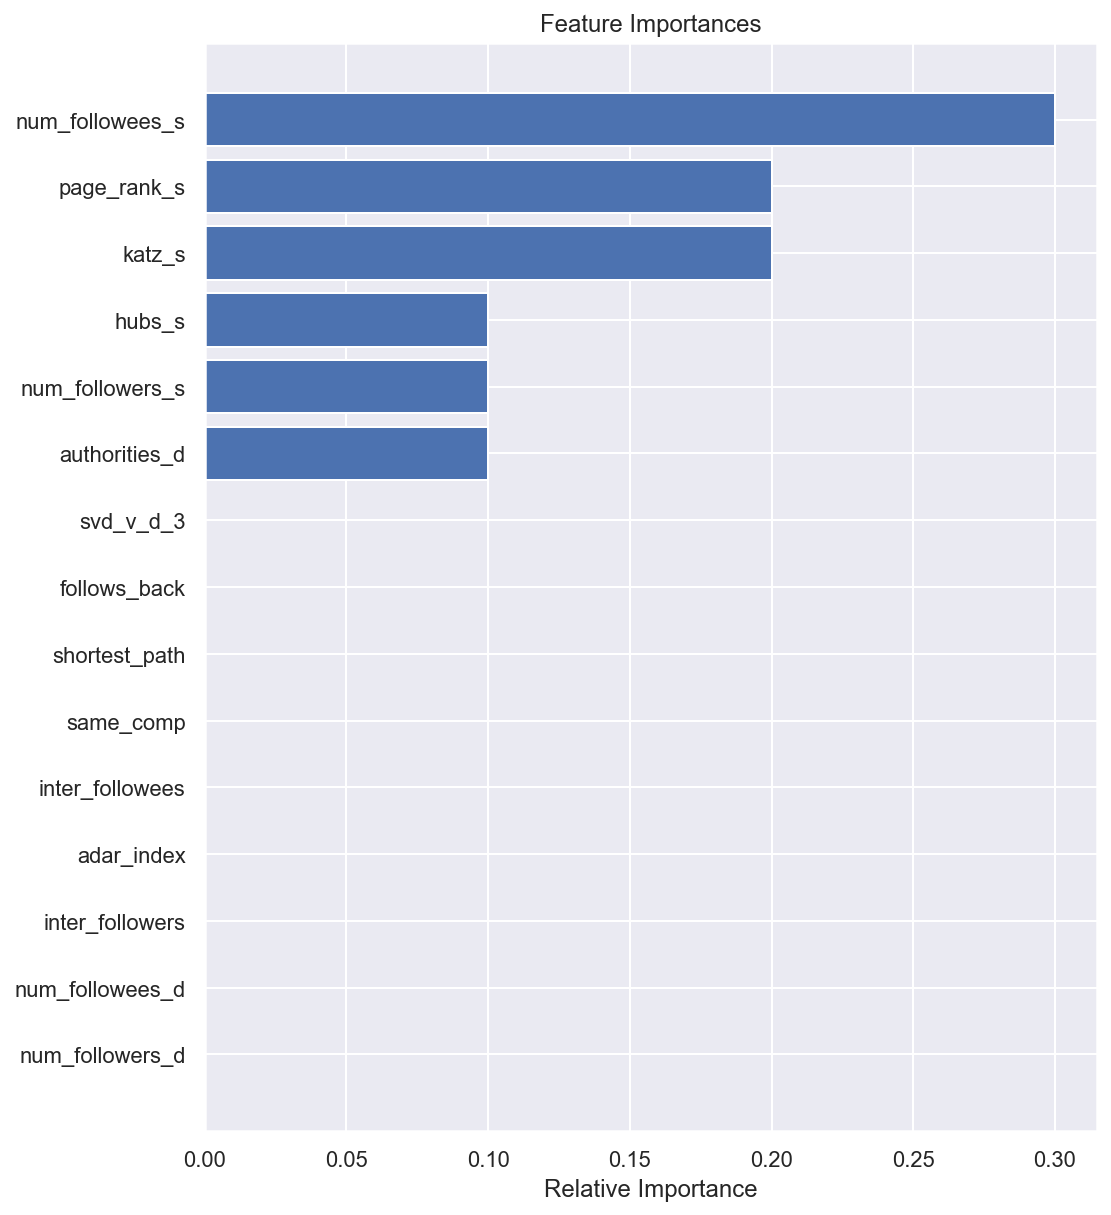

In [124]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-15:]
plt.figure(figsize=(8,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [125]:
df.head()

Primary Unit  Sub Unit 1        Sub Unit 2  Sub Unit 3  \
0       Unit 1  Technology  Cloud Technology  Containers   
1       Unit 1  Technology  Cloud Technology  Containers   
2       Unit 1  Technology  Cloud Technology        PaaS   
3       Unit 1  Technology  Cloud Technology        PaaS   
4       Unit 1  Technology  Cloud Technology        PaaS   

                     Skill  primary_unit_encoded  sub_unit_1_encoded  \
0                   Docker                   142                 140   
1               Kubernetes                   142                 140   
2      Database management                   142                 140   
3                   No SQL                   142                 140   
4  Application Development                   142                 140   

   sub_unit_2_encoded  sub_unit_3_encoded  skill_encoded  
0                  43                  45             56  
1                  43                  45             84  
2                  43                  97             53  
3                  43                  97             94  
4                  43                  97             13

In [126]:
unique_proc = pd.DataFrame({'process_count' : df.groupby(['Primary Unit','Sub Unit 1','Sub Unit 2','Sub Unit 3','Skill']).size()}).reset_index()


In [127]:
A = list(unique_proc["Primary Unit"].unique())
#B = list(unique_proc["Sub Domain"].unique())

node_list = set(A)

G = nx.Graph()

for i in node_list:
    G.add_node(i)
    
for i,j in unique_proc.iterrows():
    G.add_edges_from([(j["Primary Unit"],j["Skill"])])

pos = nx.spring_layout(G, k=0.5, iterations=50)

for n, p in pos.items():
    G.nodes[n]['pos'] = p
    
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.8,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])
    
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='RdBu',
        reversescale=True,
        color=[],
        size=15,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = adjacencies[0] +' # of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])
    
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Skill Tree graph per unit',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="No. of connections",
                    showarrow=False,
                    xref="paper", yref="paper") ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig)

In [129]:
import plotly

In [130]:
plotly.offline.plot(fig, filename='primary_unit.html') 

'primary_unit.html'

In [131]:
unique_proc_1 = pd.DataFrame({'process_count' : df.groupby(['Sub Unit 1','Sub Unit 2','Sub Unit 3','Skill']).size()}).reset_index()


In [132]:
A = list(unique_proc_1["Sub Unit 1"].unique())
#B = list(unique_proc["Sub Domain"].unique())

node_list = set(A)

G = nx.Graph()

for i in node_list:
    G.add_node(i)
    
for i,j in unique_proc_1.iterrows():
    G.add_edges_from([(j["Sub Unit 1"],j["Skill"])])

pos = nx.spring_layout(G, k=0.5, iterations=50)

for n, p in pos.items():
    G.nodes[n]['pos'] = p
    
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.8,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])
    
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='RdBu',
        reversescale=True,
        color=[],
        size=15,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = adjacencies[0] +' # of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])
    
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Skill Tree graph per unit',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="No. of connections",
                    showarrow=False,
                    xref="paper", yref="paper") ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig)

In [133]:
plotly.offline.plot(fig, filename='sub_unit_1.html') 

'sub_unit_1.html'

In [134]:
unique_proc_2 = pd.DataFrame({'process_count' : df.groupby(['Sub Unit 2','Sub Unit 3','Skill']).size()}).reset_index()


In [135]:
A = list(unique_proc_2["Sub Unit 2"].unique())
#B = list(unique_proc["Sub Domain"].unique())

node_list = set(A)

G = nx.Graph()

for i in node_list:
    G.add_node(i)
    
for i,j in unique_proc_2.iterrows():
    G.add_edges_from([(j["Sub Unit 2"],j["Skill"])])

pos = nx.spring_layout(G, k=0.5, iterations=50)

for n, p in pos.items():
    G.nodes[n]['pos'] = p
    
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=1.3,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])
    
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='RdBu',
        reversescale=True,
        color=[],
        size=15,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = adjacencies[0] +' # of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])
    
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Skill Tree graph per unit',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="No. of connections",
                    showarrow=False,
                    xref="paper", yref="paper") ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

iplot(fig)

In [136]:
plotly.offline.plot(fig, filename='sub_unit_2.html') 

'sub_unit_2.html'

In [137]:
def edge_to_remove(graph):
    G_dict = nx.edge_betweenness_centrality(graph)
    edge = ()

  # extract the edge with highest edge betweenness centrality score
    for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
        edge = key
        break

    return edge

In [138]:
def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    return sg

In [139]:
A = list(unique_proc["Primary Unit"].unique())
#B = list(unique_proc["Sub Domain"].unique())

node_list = set(A)

G = nx.Graph()

for i in node_list:
    G.add_node(i)
    
for i,j in unique_proc.iterrows():
    G.add_edges_from([(j["Primary Unit"],j["Skill"])])

pos = nx.spring_layout(G, k=0.5, iterations=50)

for n, p in pos.items():
    G.nodes[n]['pos'] = p
    
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.8,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])
    
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='RdBu',
        reversescale=True,
        color=[],
        size=15,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = adjacencies[0] +' # of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

In [140]:
# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
    node_groups.append(list(i))

In [141]:
len(node_groups)

6

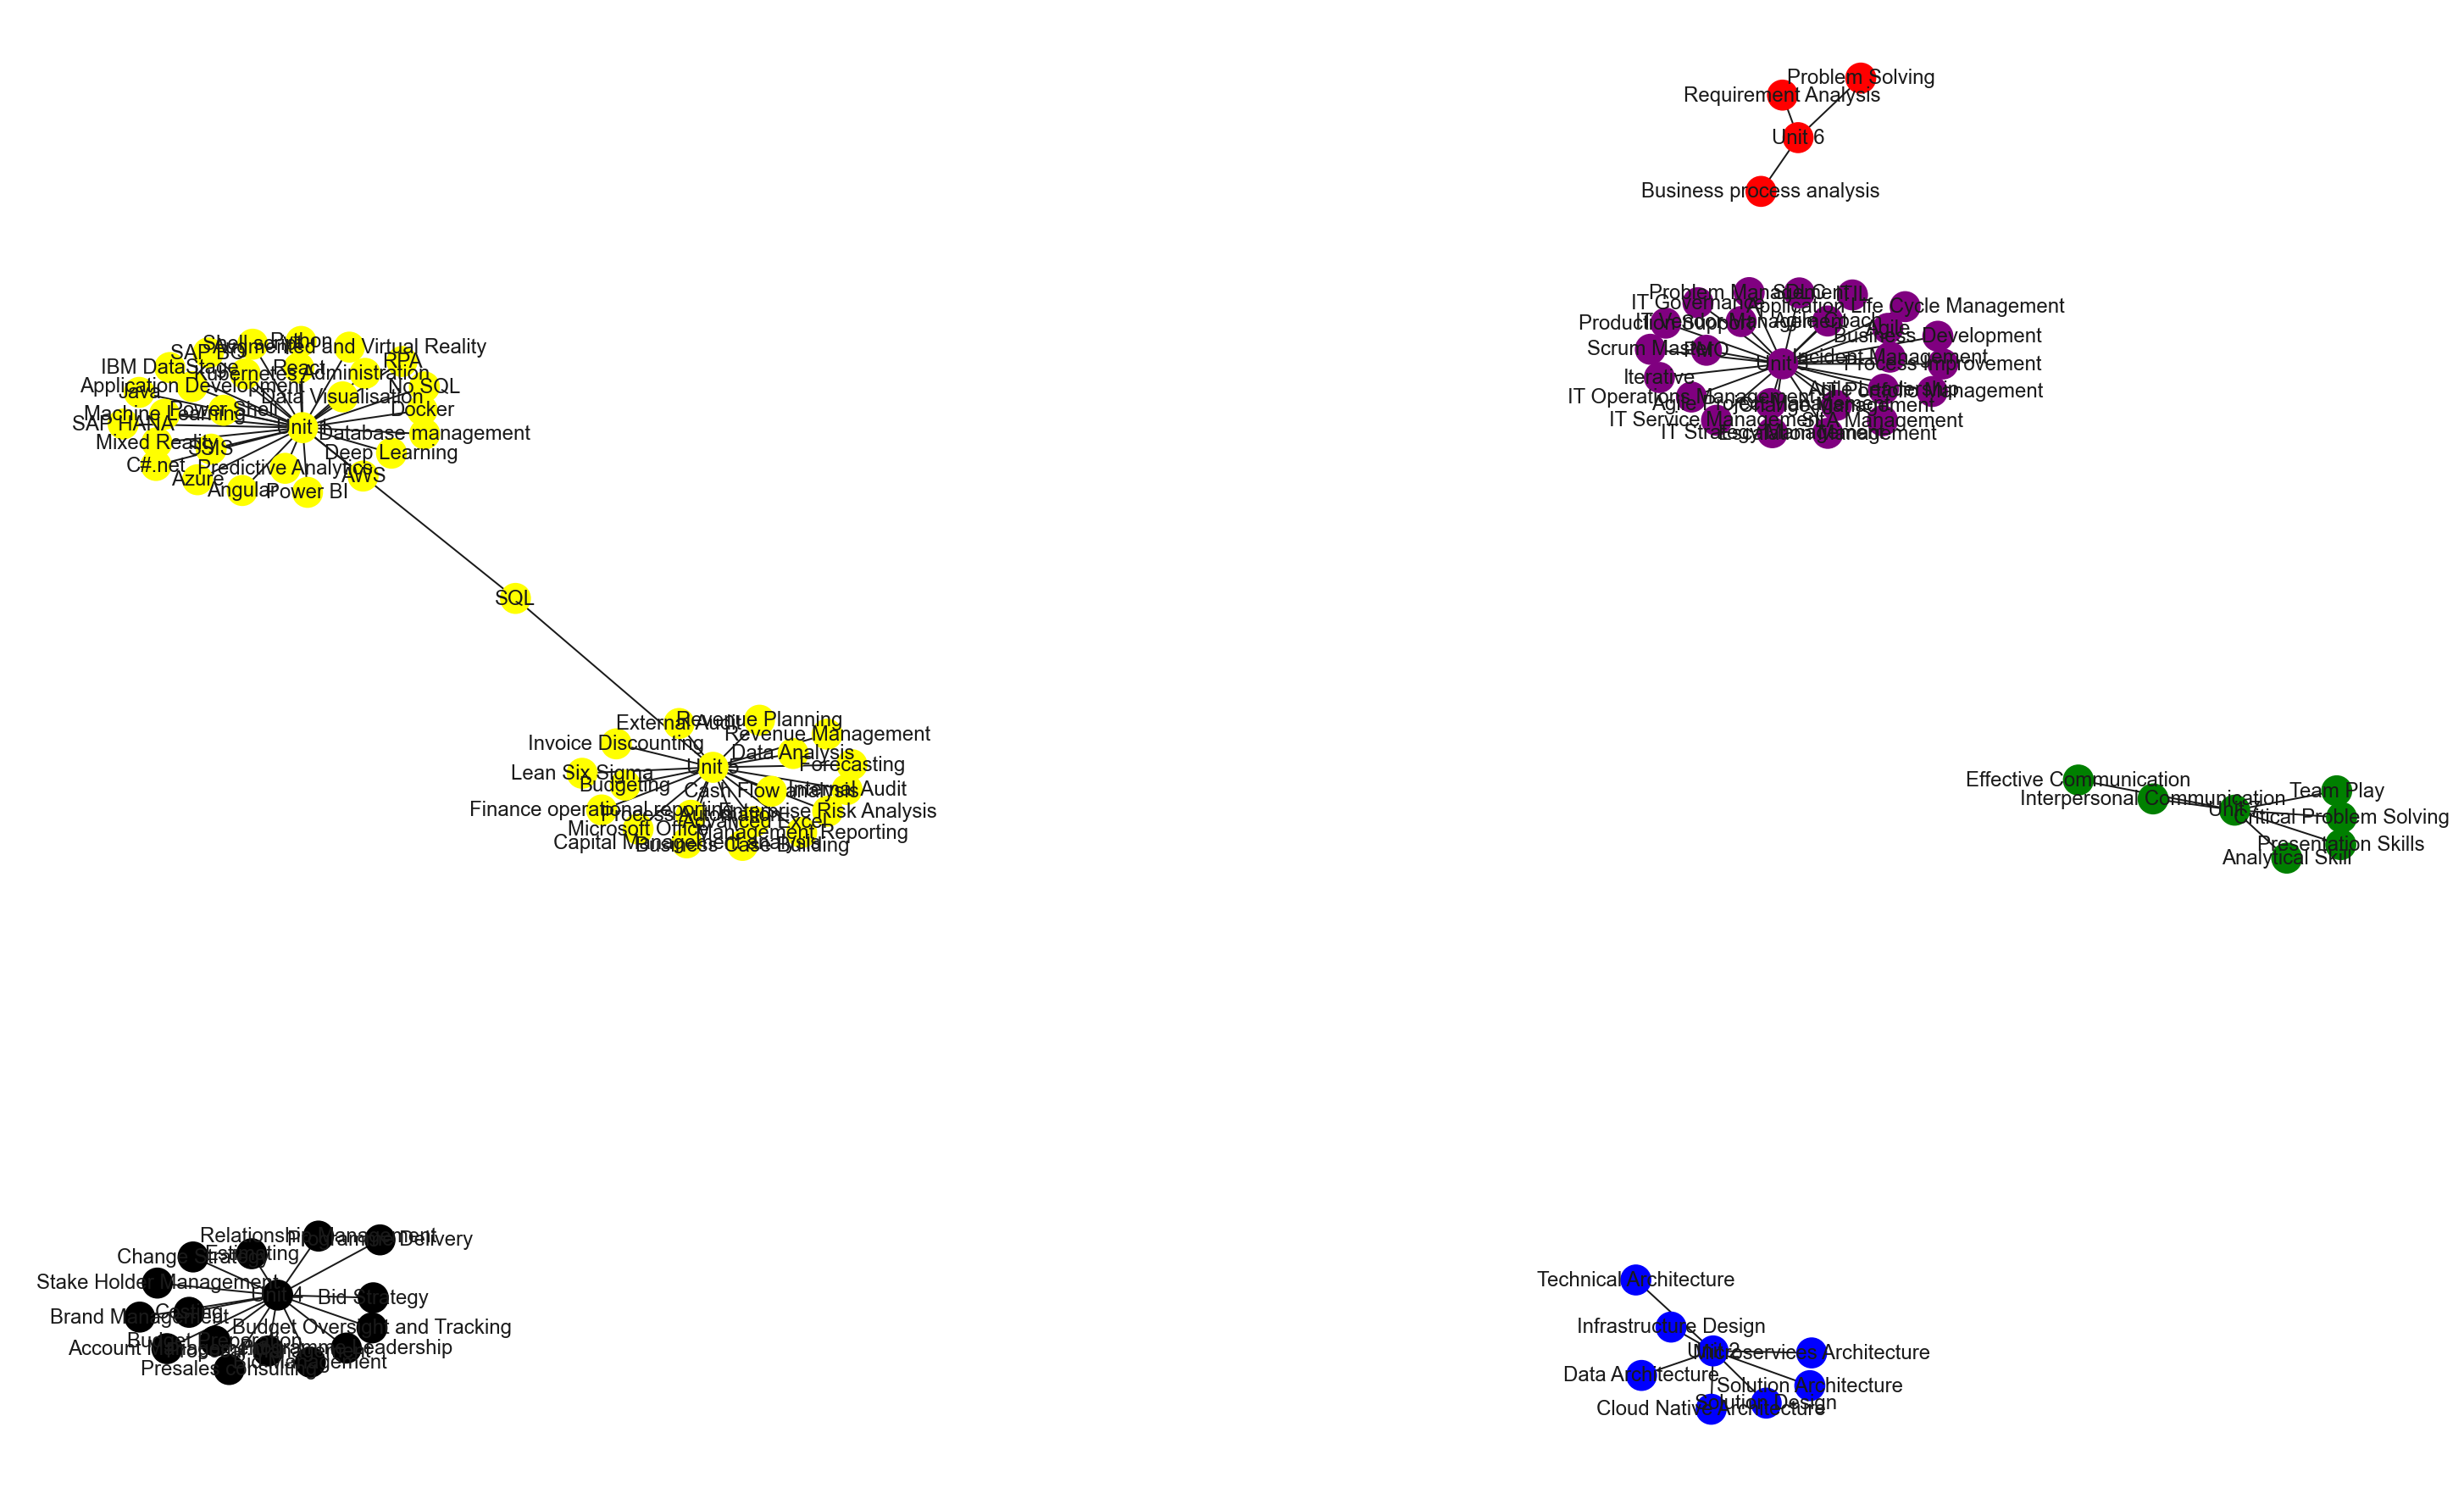

In [142]:
plt.figure(figsize=(20,12))

# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    elif node in node_groups[1]:
        color_map.append('green')
    elif node in node_groups[2]:
        color_map.append('yellow')
    elif node in node_groups[3]:
        color_map.append('black')
    elif node in node_groups[4]:
        color_map.append('purple')
    else:
        color_map.append('red')
#print(color_map)
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import community
import matplotlib
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from collections import Counter

In [144]:
# Centrality Metrics

# Calculating Centrality metrics for the Graph

dict_degree_centrality = nx.degree_centrality(G)
dict_closeness_centrality = nx.closeness_centrality(G)
dict_eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

In [145]:
# Top 10 nodes with the largest values of degree centrality in descending order
dict(Counter(dict_degree_centrality).most_common(10))

{'Unit 1': 0.2616822429906542,
 'Unit 3': 0.22429906542056072,
 'Unit 5': 0.17757009345794392,
 'Unit 4': 0.14018691588785046,
 'Unit 2': 0.06542056074766354,
 'Unit 7': 0.05607476635514018,
 'Unit 6': 0.02803738317757009,
 'SQL': 0.018691588785046728,
 'Docker': 0.009345794392523364,
 'Kubernetes': 0.009345794392523364}

In [146]:
# Top 10 nodes with the largest values of closeness centrality in descending order
dict(Counter(dict_closeness_centrality).most_common(10))

{'Unit 1': 0.2457721406319537,
 'SQL': 0.22440065014221863,
 'Unit 3': 0.22429906542056074,
 'Unit 5': 0.2024005864027854,
 'Docker': 0.15880661394680085,
 'Kubernetes': 0.15880661394680085,
 'Application Development': 0.15880661394680085,
 'Database management': 0.15880661394680085,
 'No SQL': 0.15880661394680085,
 'Power BI': 0.15880661394680085}

In [147]:
# Top 10 nodes with the largest values of eigenvector centrality in descending order
dict(Counter(dict_eigenvector_centrality).most_common(10))

{'Unit 1': 0.7028845572197768,
 'SQL': 0.14712592024526353,
 'Docker': 0.13257307764296936,
 'Kubernetes': 0.13257307764296936,
 'Application Development': 0.13257307764296936,
 'Database management': 0.13257307764296936,
 'No SQL': 0.13257307764296936,
 'Power BI': 0.13257307764296936,
 'SAP BO': 0.13257307764296936,
 'IBM DataStage': 0.13257307764296936}

<ipython-input-148-88d951466a1c>:5: MatplotlibDeprecationWarning:

default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.



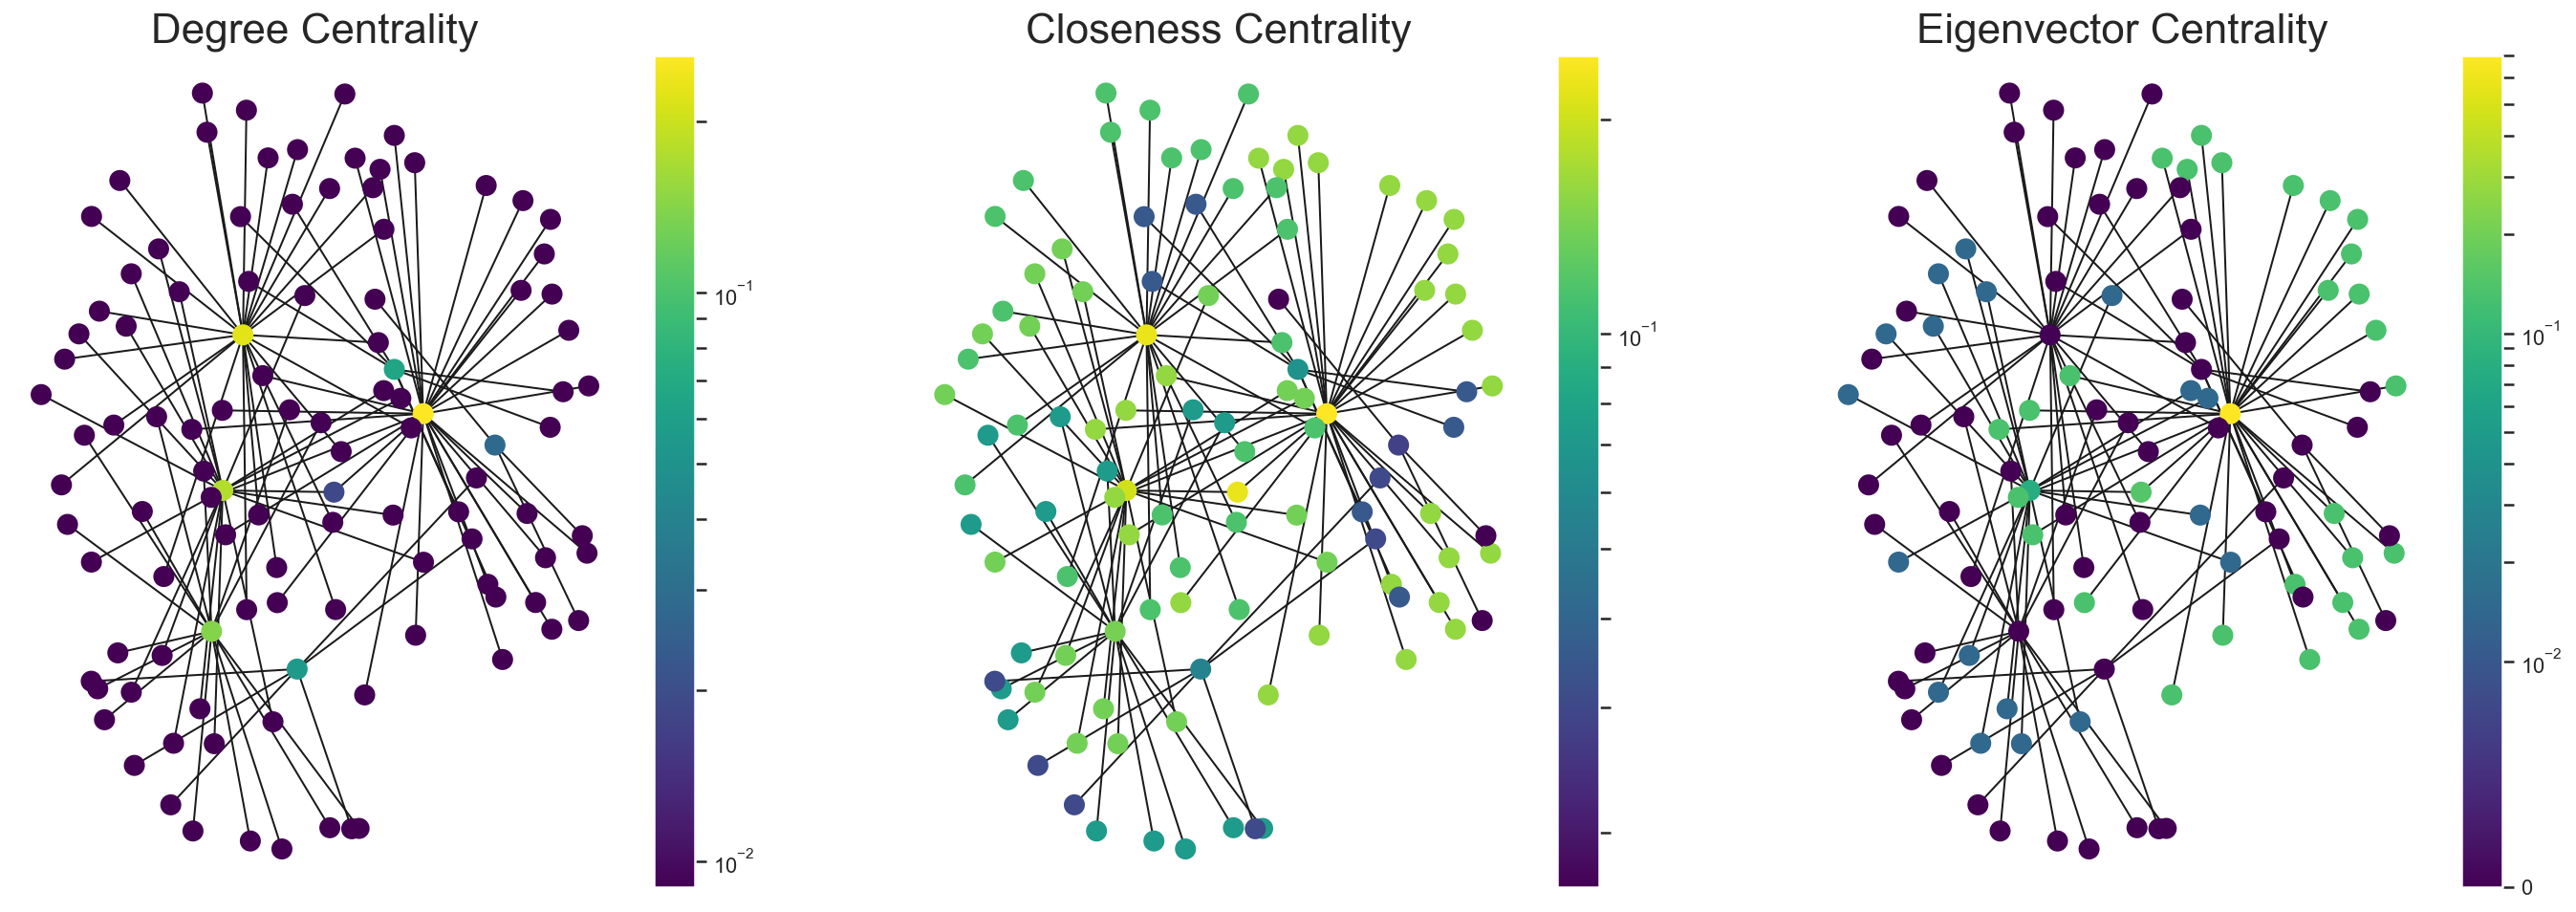

In [148]:
# Function to plot the graphs for each centrality metric
matplotlib.rcParams['figure.figsize']= [24, 8]
def draw(G, pos, lista, listb, measure_name):
    nodes=nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.viridis,node_color=lista,nodelist=listb)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    edges=nx.draw_networkx_edges(G, pos)
    plt.title(measure_name, fontsize=22, fontname='Arial')
    plt.colorbar(nodes)
    plt.axis('off')

plt.subplot(1,3,1)
list_pos_values = []
for i in nx.degree_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.degree_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Degree Centrality')

plt.subplot(1,3,2)
list_pos_values=[]
for i in nx.closeness_centrality(G).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.closeness_centrality(G).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Closeness Centrality')

plt.subplot(1,3,3)
list_pos_values=[]
for i in nx.eigenvector_centrality(G,max_iter=1000).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.eigenvector_centrality(G,max_iter=1000).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Eigenvector Centrality')
plt.savefig('centrality_summary.png' , dpi=400)

In [149]:
#!pip install python-louvain
from networkx.algorithms.community.centrality import girvan_newman
from community import community_louvain
# Starting with an initial partition of the graph and running the Louvain algorithm for Community Detection
partition=community_louvain.best_partition(G, weight='process_count')
print('Completed Louvain algorithm .. . . ' )
values=[partition.get(node) for node in G.nodes()]
list_com=partition.values()

# Creating a dictionary like {community_number:list_of_participants}
dict_nodes={}

# Populating the dictionary with items
for each_item in partition.items():
    community_num=each_item[1]
    community_node=each_item[0]
    if community_num in dict_nodes:
        value=dict_nodes.get(community_num) + ' | ' + str(community_node)
        dict_nodes.update({community_num:value})
    else:
        dict_nodes.update({community_num:community_node})

# Creating a dataframe from the diet, and getting the output into excel
community_df=pd.DataFrame.from_dict(dict_nodes, orient='index',columns=['Members'])
community_df.index.rename('Community_Num' , inplace=True)
community_df.to_csv('Community_List_snippet.csv')

Completed Louvain algorithm .. . . 


Modularity:  0.7949346405228759
Total number of Communities= 7


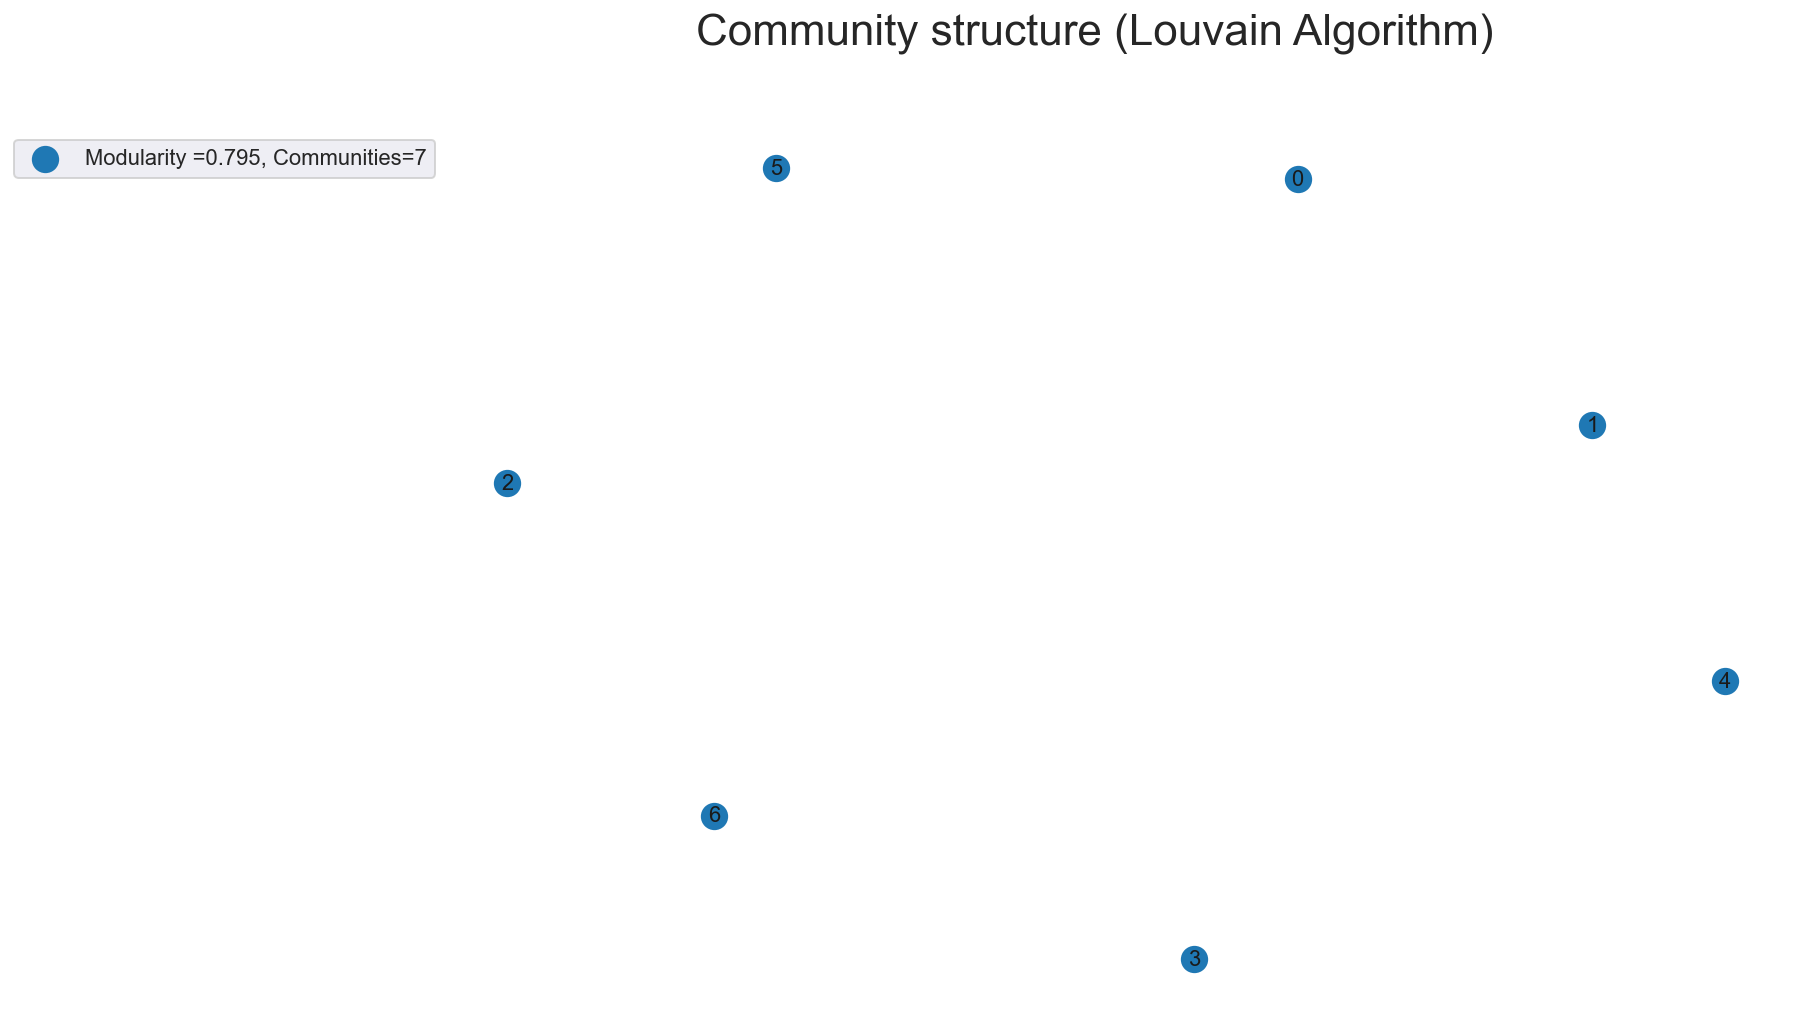

In [150]:
# Creating a new graph to represent the communities created by the Louvain algorithm
matplotlib.rcParams['figure.figsize']= [12, 8]
G_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
G_comm.add_nodes_from(dict_nodes)

# Calculating modularity and the total number of communities
mod=community_louvain.modularity(partition,G)
print("Modularity: ", mod)
print("Total number of Communities=", len(G_comm.nodes()))

# Creating the Graph and also calculating Modularity
matplotlib.rcParams['figure.figsize']= [12, 8]
pos_louvain=nx.spring_layout(G_comm)
nx.draw_networkx(G_comm, pos_louvain, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(mod,3)) +
                    ', Communities=' + str(len(G_comm.nodes())))
plt.suptitle('Community structure (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('louvain.png',dpi=400, bbox_inches='tight')

In [151]:
# Viewing the list of communities
community_df

Members
Community_Num                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
0                                                                                                                                                                                                                                                                                                                    Unit 2 | Cloud Native Architecture | Data Architecture | Microservices Architecture | Solution Architecture | Technical Architecture | Infrastructure Design | Solution Design
1                                                                                                                                                                                                                                                                                                                                                    Unit 7 | Analytical Skill | Critical Problem Solving | Interpersonal Communication | Team Play | Effective Communication | Presentation Skills
2                                                                                                           Unit 1 | Docker | Kubernetes | Application Development | Database management | No SQL | Power BI | SAP BO | IBM DataStage | SSIS | SAP HANA | Data Visualisation | Predictive Analytics | Deep Learning | Machine Learning | Augmented and Virtual Reality | Mixed Reality | RPA | AWS | Azure | Administration | Power Shell | Python | Shell script | C#.net | Java | Angular | React
3                                                                                                                                                                          Unit 4 | Budget Oversight and Tracking | Budget Preparation | Costing | Estimating | Bid Management | Bid Strategy | Brand Management | Presales consulting | Account Management | Proposal Management | Relationship Management | Stake Holder Management | Change Strategy | Programme Delivery | Programme Leadership
4                                                                                                    Unit 5 | SQL | Business Case Building | Forecasting | Lean Six Sigma | Capital Management analysis | Cash Flow analysis | Finance operational reporting | External Audit | Internal Audit | Invoice Discounting | Revenue Management | Budgeting | Process Automation | Revenue Planning | Data Analysis | Enterprise Risk Analysis | Management Reporting | Advanced Excel | Microsoft Office
5              Unit 3 | Agile Coach | Agile Leadership | Application Life Cycle Management | Business Development | Agile Project Management | IT Governance | IT Strategy Management | IT Vendor Management | Agile | Iterative | Process Improvement | Scrum Master | SDLC | IT Portfolio Management | IT Service Management | ITIL | Change Management | Escalation Management | IT Operations Management | Incident Management | Problem Management | Production Support | SLA Management | PMO
6                                                                                                                                                                                                                                                                                                                                                                                                                       Unit 6 | Business process analysis | Problem Solving | Requirement Analysis

NetworkXError: Node 'Unit 2' has no position.

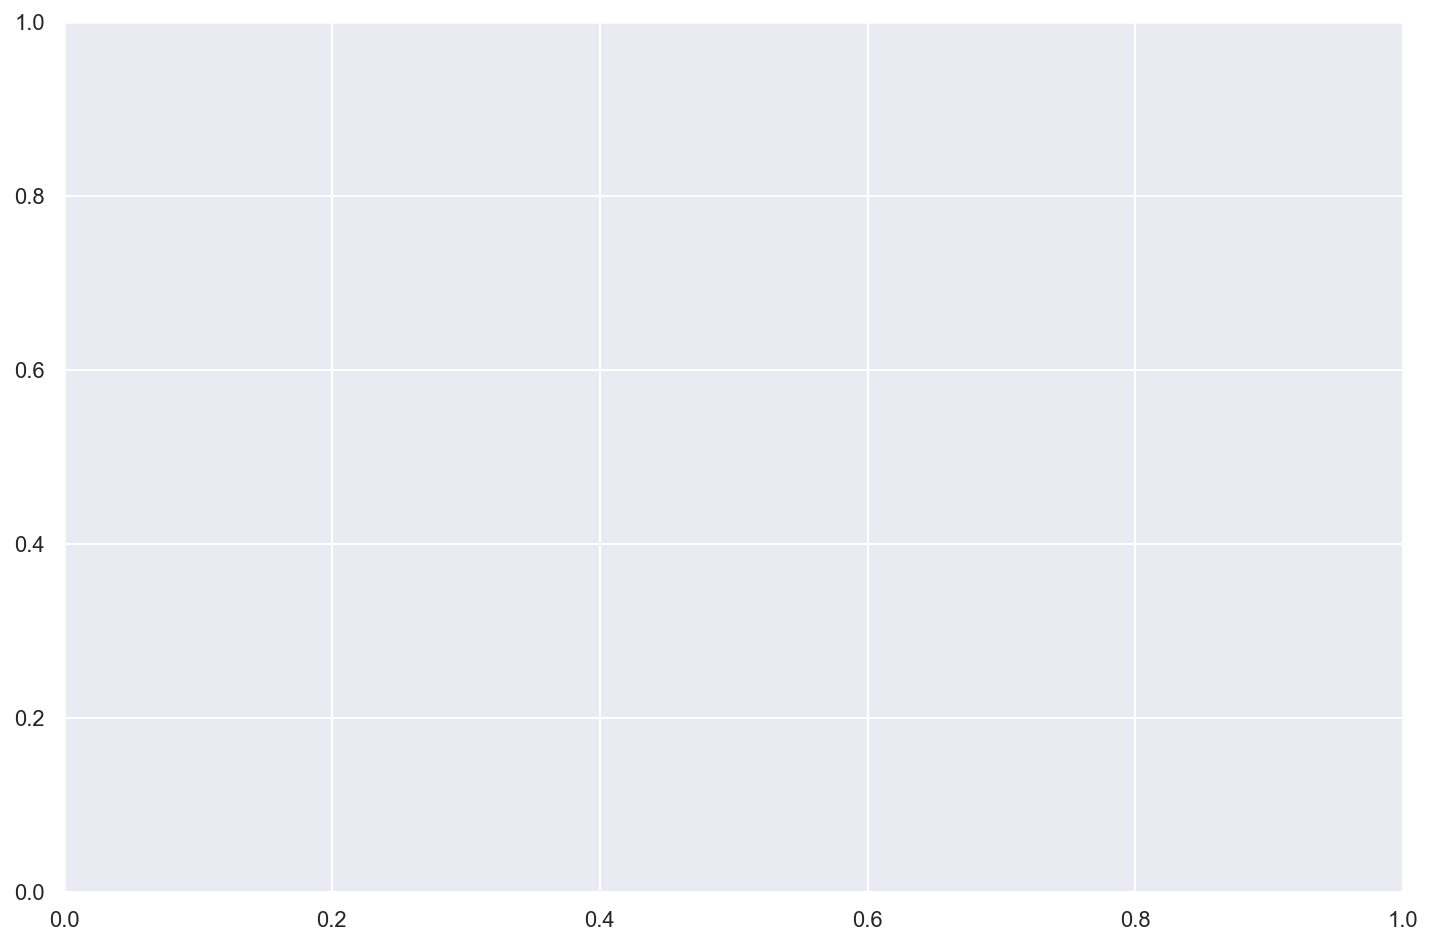

In [182]:
# Now we try to obtain the color coded graph for each community
nx.draw_networkx(G, pos, cmap=plt.get_cmap('magma'), node_color=values,node_size=60, with_labels=False)
plt.suptitle('Louviin Algorithm Community Structure',fontsize=22)
plt.box(on=None)
plt.axis('off')
plt.savefig('louvain_2_primary.png',dpi=400, bbox_inches='tight')
plt.show()

In [153]:
A = list(unique_proc_1["Sub Unit 1"].unique())
#B = list(unique_proc["Sub Domain"].unique())

node_list = set(A)

G1 = nx.Graph()

for i in node_list:
    G1.add_node(i)
    
for i,j in unique_proc_1.iterrows():
    G1.add_edges_from([(j["Sub Unit 1"],j["Skill"])])

pos = nx.spring_layout(G1, k=0.5, iterations=50)

for n, p in pos.items():
    G1.nodes[n]['pos'] = p
    
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.8,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G1.edges():
    x0, y0 = G1.nodes[edge[0]]['pos']
    x1, y1 = G1.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])
    
node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='RdBu',
        reversescale=True,
        color=[],
        size=15,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))

for node in G1.nodes():
    x, y = G1.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = adjacencies[0] +' # of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])
    

In [154]:
# Centrality Metrics

# Calculating Centrality metrics for the Graph

dict_degree_centrality = nx.degree_centrality(G1)
dict_closeness_centrality = nx.closeness_centrality(G1)
dict_eigenvector_centrality = nx.eigenvector_centrality(G1, max_iter=1000)

In [155]:
# Top 10 nodes with the largest values of degree centrality in descending order
dict(Counter(dict_degree_centrality).most_common(10))

{'Technology': 0.5619047619047619,
 'Finance ': 0.18095238095238098,
 'Management': 0.14285714285714288,
 'Process': 0.05714285714285715,
 'Business Analysis': 0.028571428571428574,
 'SQL': 0.01904761904761905,
 'Business process analysis': 0.009523809523809525,
 'Problem Solving': 0.009523809523809525,
 'Requirement Analysis': 0.009523809523809525,
 'Business Case Building': 0.009523809523809525}

In [156]:
# Top 10 nodes with the largest values of closeness centrality in descending order
dict(Counter(dict_closeness_centrality).most_common(10))

{'Technology': 0.5038509316770187,
 'SQL': 0.37625231910946194,
 'Cloud Native Architecture': 0.3017857142857143,
 'Data Architecture': 0.3017857142857143,
 'Microservices Architecture': 0.3017857142857143,
 'Solution Architecture': 0.3017857142857143,
 'Technical Architecture': 0.3017857142857143,
 'Docker': 0.3017857142857143,
 'Kubernetes': 0.3017857142857143,
 'Application Development': 0.3017857142857143}

In [157]:
# Top 10 nodes with the largest values of eigenvector centrality in descending order
dict(Counter(dict_eigenvector_centrality).most_common(10))

{'Technology': 0.706890330171232,
 'SQL': 0.09430750726136318,
 'Cloud Native Architecture': 0.09200872494630481,
 'Data Architecture': 0.09200872494630481,
 'Microservices Architecture': 0.09200872494630481,
 'Solution Architecture': 0.09200872494630481,
 'Technical Architecture': 0.09200872494630481,
 'Docker': 0.09200872494630481,
 'Kubernetes': 0.09200872494630481,
 'Application Development': 0.09200872494630481}

<ipython-input-158-053d31b4f6bc>:5: MatplotlibDeprecationWarning:

default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.



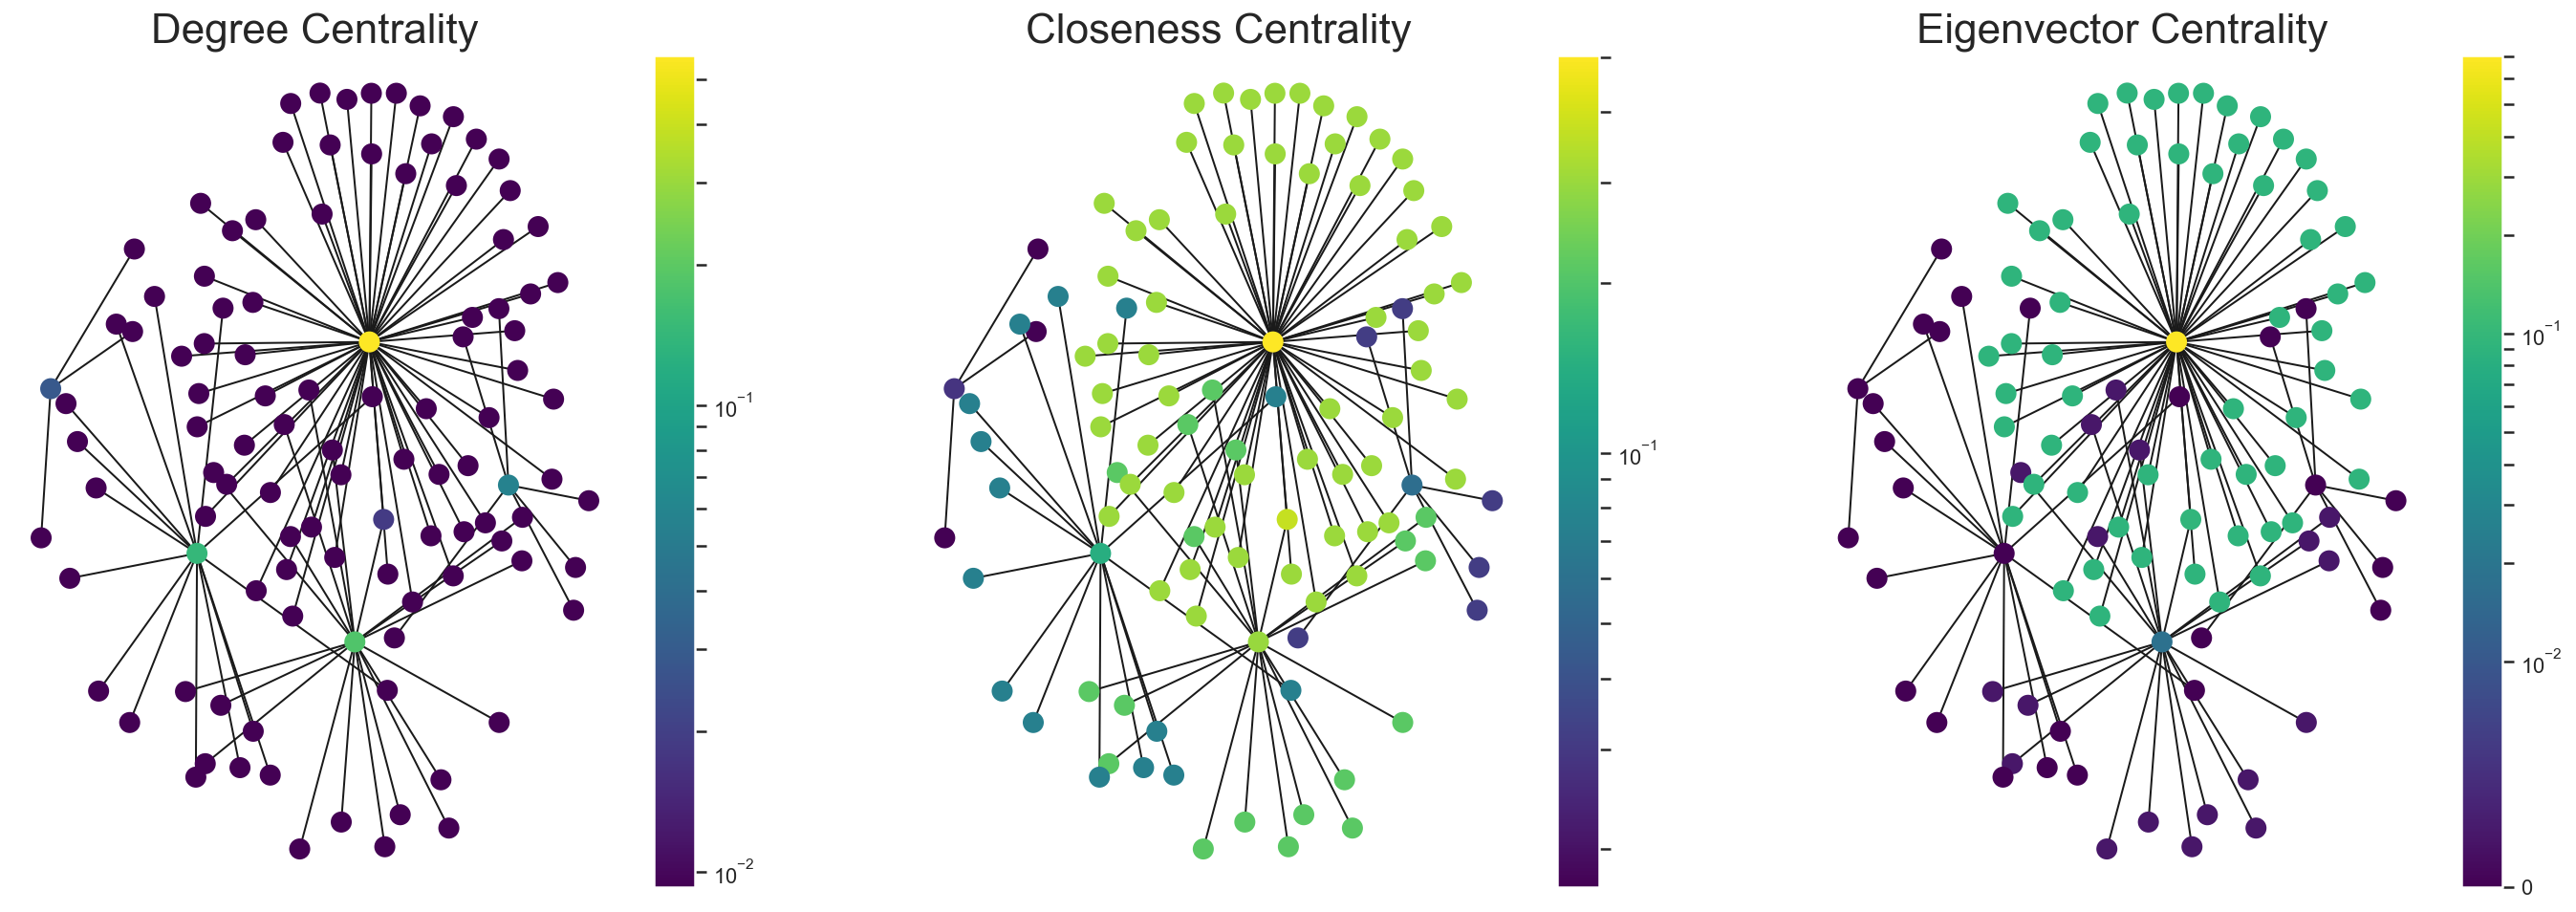

In [158]:
# Function to plot the graphs for each centrality metric
matplotlib.rcParams['figure.figsize']= [24, 8]
def draw(G, pos, lista, listb, measure_name):
    nodes=nx.draw_networkx_nodes(G1, pos, node_size=100, cmap=plt.cm.viridis,node_color=lista,nodelist=listb)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    edges=nx.draw_networkx_edges(G1, pos)
    plt.title(measure_name, fontsize=22, fontname='Arial')
    plt.colorbar(nodes)
    plt.axis('off')

plt.subplot(1,3,1)
list_pos_values = []
for i in nx.degree_centrality(G1).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.degree_centrality(G1).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Degree Centrality')

plt.subplot(1,3,2)
list_pos_values=[]
for i in nx.closeness_centrality(G1).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.closeness_centrality(G1).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Closeness Centrality')

plt.subplot(1,3,3)
list_pos_values=[]
for i in nx.eigenvector_centrality(G1,max_iter=1000).values():
    list_pos_values.append(i)
    list_pos_keys=[]
for i in nx.eigenvector_centrality(G1,max_iter=1000).keys():
    list_pos_keys.append(i)
draw(G, pos, list_pos_values, list_pos_keys, 'Eigenvector Centrality')
plt.savefig('centrality_summary.png' , dpi=400)

In [159]:
#!pip install python-louvain
from networkx.algorithms.community.centrality import girvan_newman
from community import community_louvain
# Starting with an initial partition of the graph and running the Louvain algorithm for Community Detection
partition=community_louvain.best_partition(G1, weight='process_count')
print('Completed Louvain algorithm .. . . ' )
values=[partition.get(node) for node in G1.nodes()]
list_com=partition.values()

# Creating a dictionary like {community_number:list_of_participants}
dict_nodes={}

# Populating the dictionary with items
for each_item in partition.items():
    community_num=each_item[1]
    community_node=each_item[0]
    if community_num in dict_nodes:
        value=dict_nodes.get(community_num) + ' | ' + str(community_node)
        dict_nodes.update({community_num:value})
    else:
        dict_nodes.update({community_num:community_node})

# Creating a dataframe from the diet, and getting the output into excel
community_df=pd.DataFrame.from_dict(dict_nodes, orient='index',columns=['Members'])
community_df.index.rename('Community_Num' , inplace=True)
community_df.to_csv('Community_List_snippet.csv')

Completed Louvain algorithm .. . . 


Modularity:  0.5987600922722031
Total number of Communities= 5


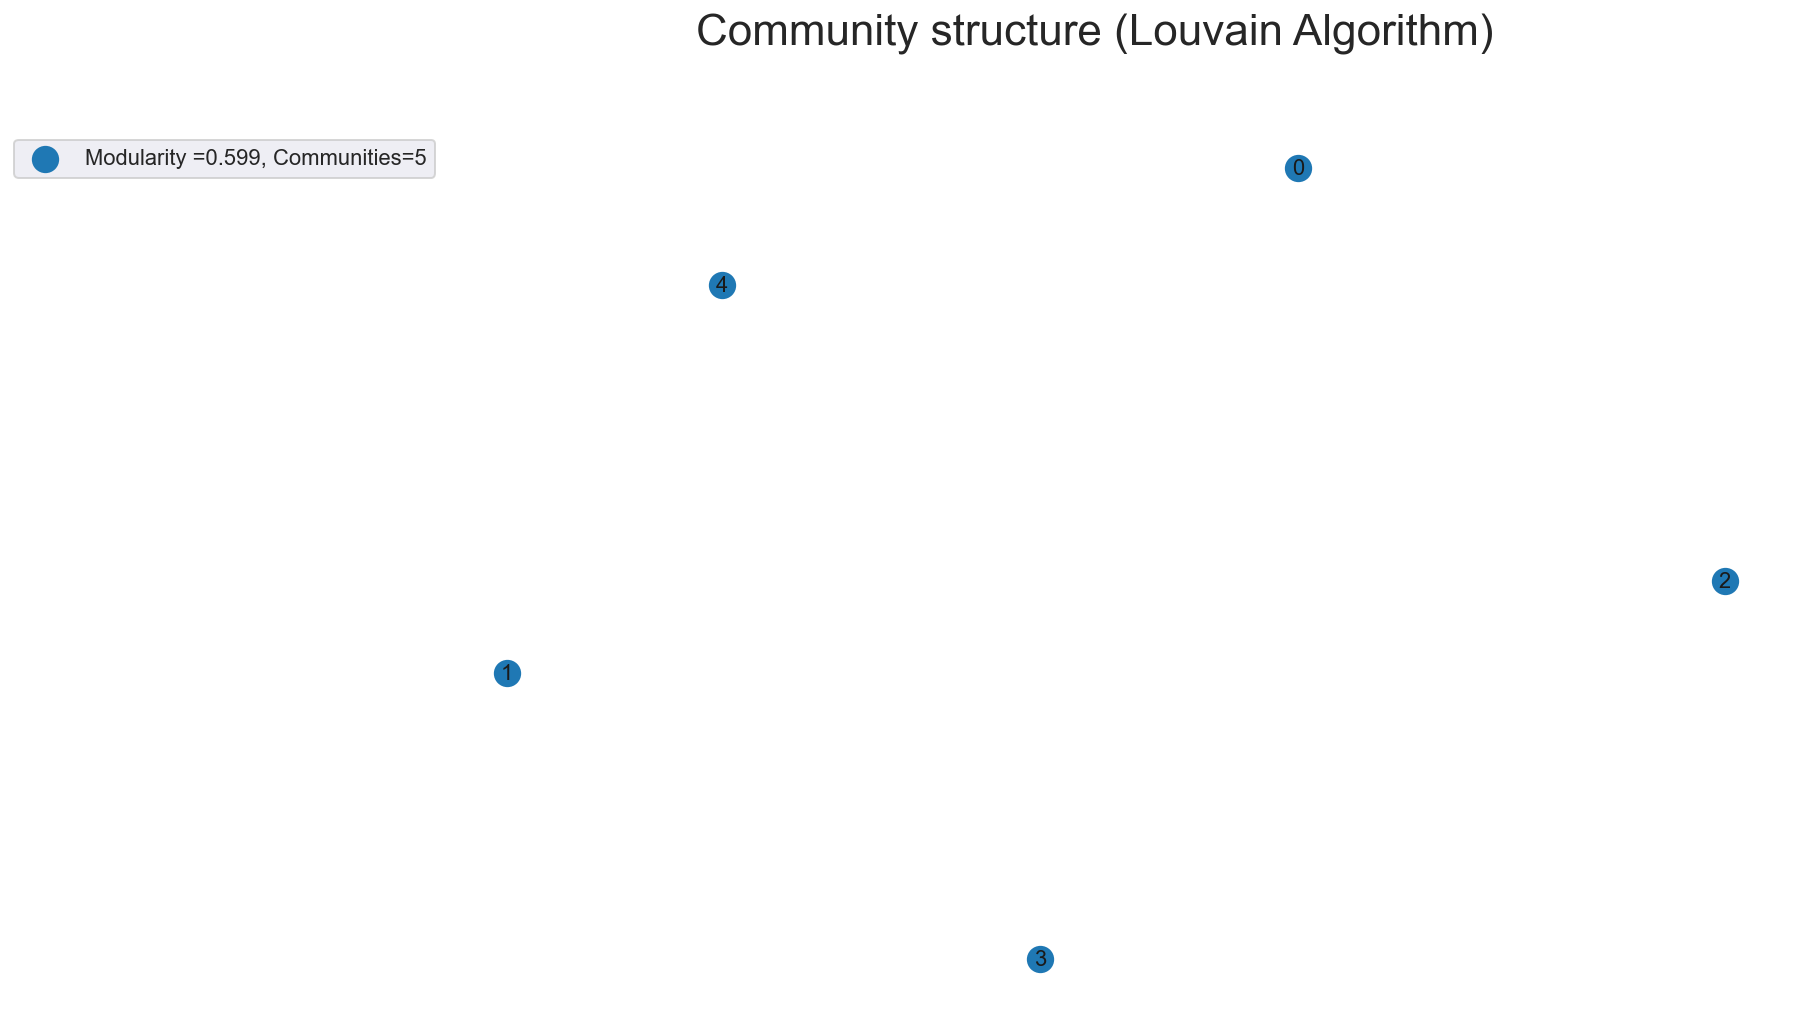

In [160]:
# Creating a new graph to represent the communities created by the Louvain algorithm
matplotlib.rcParams['figure.figsize']= [12, 8]
G_comm=nx.Graph()

# Populating the data from the node dictionary created earlier
G_comm.add_nodes_from(dict_nodes)

# Calculating modularity and the total number of communities
mod=community_louvain.modularity(partition,G1)
print("Modularity: ", mod)
print("Total number of Communities=", len(G_comm.nodes()))

# Creating the Graph and also calculating Modularity
matplotlib.rcParams['figure.figsize']= [12, 8]
pos_louvain=nx.spring_layout(G_comm)
nx.draw_networkx(G_comm, pos_louvain, with_labels=True,node_size=160,font_size=11,label='Modularity =' + str(round(mod,3)) +
                    ', Communities=' + str(len(G_comm.nodes())))
plt.suptitle('Community structure (Louvain Algorithm)',fontsize=22,fontname='Arial')
plt.box(on=None)
plt.axis('off')
plt.legend(bbox_to_anchor=(0,1), loc='best', ncol=1)
plt.savefig('louvain.png',dpi=400, bbox_inches='tight')

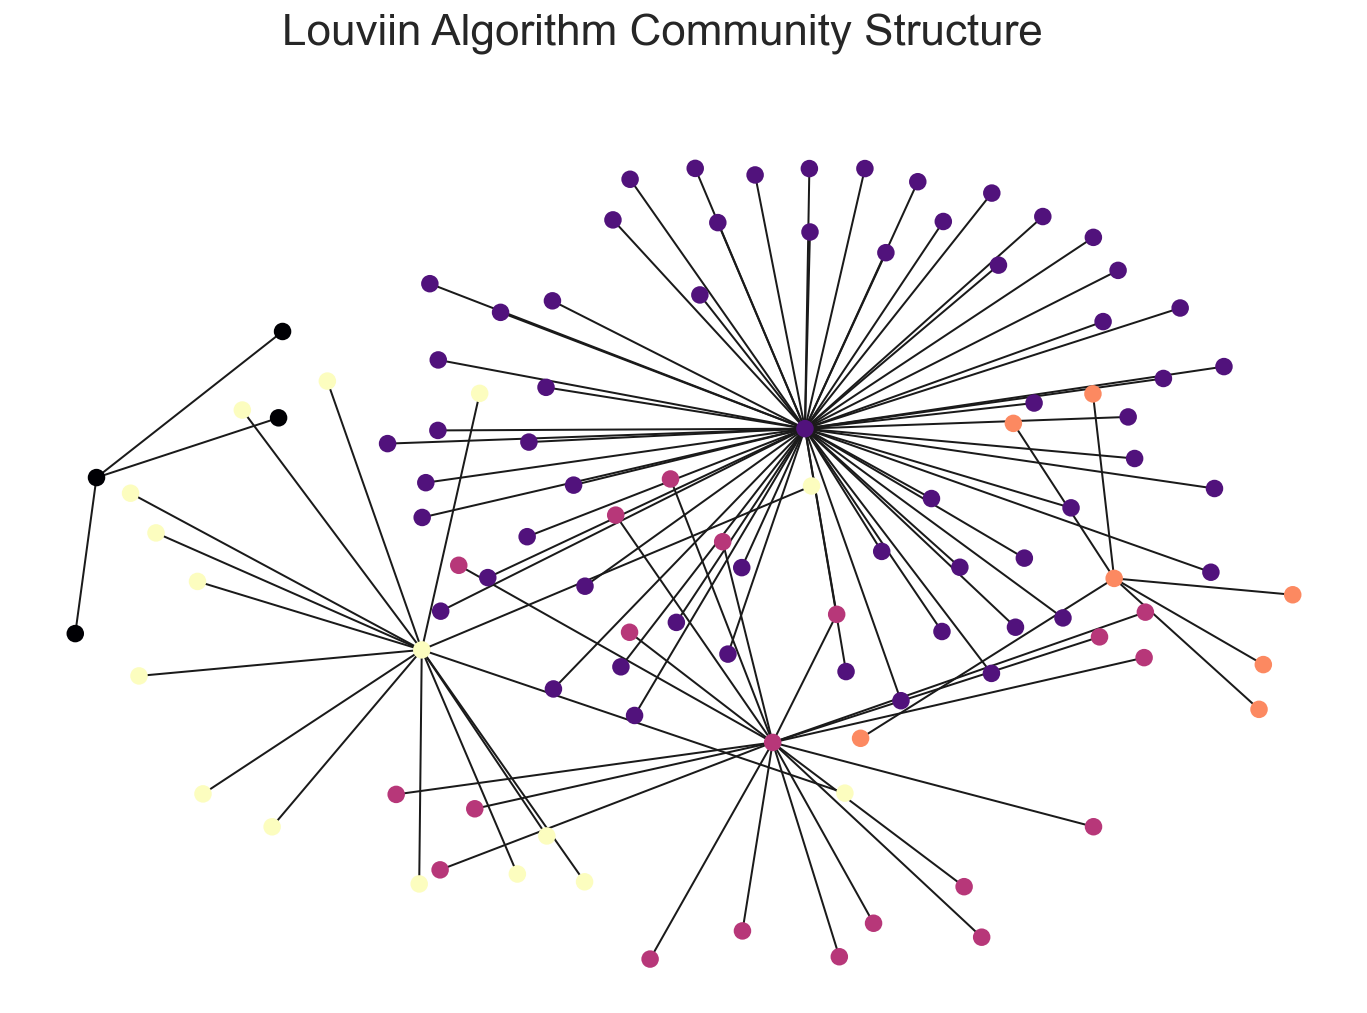

In [185]:
# Now we try to obtain the color coded graph for each community
nx.draw_networkx(G1, pos, cmap=plt.get_cmap('magma'), node_color=values,node_size=60, with_labels=False)
plt.suptitle('Louviin Algorithm Community Structure',fontsize=22)
plt.box(on=None)
plt.axis('off')
plt.savefig('louvain_2_sub_unit_1_labels.png',dpi=400, bbox_inches='tight')
plt.show()

In [162]:
unique_proc

Primary Unit         Sub Unit 1                    Sub Unit 2  \
0         Unit 1         Technology              Cloud Technology   
1         Unit 1         Technology              Cloud Technology   
2         Unit 1         Technology              Cloud Technology   
3         Unit 1         Technology              Cloud Technology   
4         Unit 1         Technology              Cloud Technology   
5         Unit 1         Technology              Data Warehousing   
6         Unit 1         Technology              Data Warehousing   
7         Unit 1         Technology              Data Warehousing   
8         Unit 1         Technology              Data Warehousing   
9         Unit 1         Technology              Data Warehousing   
10        Unit 1         Technology               Emerging Trends   
11        Unit 1         Technology               Emerging Trends   
12        Unit 1         Technology               Emerging Trends   
13        Unit 1         Technology               Emerging Trends   
14        Unit 1         Technology               Emerging Trends   
15        Unit 1         Technology               Emerging Trends   
16        Unit 1         Technology               Emerging Trends   
17        Unit 1         Technology                      Platform   
18        Unit 1         Technology                      Platform   
19        Unit 1         Technology                      Platform   
20        Unit 1         Technology                      Platform   
21        Unit 1         Technology                   Programming   
22        Unit 1         Technology                   Programming   
23        Unit 1         Technology                   Programming   
24        Unit 1         Technology                   Programming   
25        Unit 1         Technology              Web Technologies   
26        Unit 1         Technology              Web Technologies   
27        Unit 1         Technology              Web Technologies   
28        Unit 1         Technology              Web Technologies   
29        Unit 2         Technology                  Architecture   
30        Unit 2         Technology                  Architecture   
31        Unit 2         Technology                  Architecture   
32        Unit 2         Technology                  Architecture   
33        Unit 2         Technology                  Architecture   
34        Unit 2         Technology                        Design   
35        Unit 2         Technology                        Design   
36        Unit 3         Technology                    Management   
37        Unit 3         Technology                    Management   
38        Unit 3         Technology                    Management   
39        Unit 3         Technology                    Management   
40        Unit 3         Technology                    Management   
41        Unit 3         Technology                    Management   
42        Unit 3         Technology                    Management   
43        Unit 3         Technology                    Management   
44        Unit 3         Technology                    Management   
45        Unit 3         Technology                    Management   
46        Unit 3         Technology                    Management   
47        Unit 3         Technology                    Management   
48        Unit 3         Technology                     Managemnt   
49        Unit 3         Technology              Service Delivery   
50        Unit 3         Technology              Service Delivery   
51        Unit 3         Technology              Service Delivery   
52        Unit 3         Technology              Service Delivery   
53        Unit 3         Technology              Service Delivery   
54        Unit 3         Technology              Service Delivery   
55        Unit 3         Technology              Service Delivery   
56        Unit 3         Technology              Service Delivery   
57

In [163]:
FG = nx.from_pandas_edgelist(unique_proc, source='Primary Unit', target='Skill', edge_attr='process_count')

In [164]:
nx.algorithms.degree_centrality(FG)

{'Unit 1': 0.2616822429906542,
 'Docker': 0.009345794392523364,
 'Kubernetes': 0.009345794392523364,
 'Application Development': 0.009345794392523364,
 'Database management': 0.009345794392523364,
 'No SQL': 0.009345794392523364,
 'Power BI': 0.009345794392523364,
 'SAP BO': 0.009345794392523364,
 'IBM DataStage': 0.009345794392523364,
 'SSIS': 0.009345794392523364,
 'SAP HANA': 0.009345794392523364,
 'Data Visualisation': 0.009345794392523364,
 'Predictive Analytics': 0.009345794392523364,
 'Deep Learning': 0.009345794392523364,
 'Machine Learning': 0.009345794392523364,
 'Augmented and Virtual Reality': 0.009345794392523364,
 'Mixed Reality': 0.009345794392523364,
 'RPA': 0.009345794392523364,
 'AWS': 0.009345794392523364,
 'Azure': 0.009345794392523364,
 'Administration': 0.009345794392523364,
 'SQL': 0.018691588785046728,
 'Power Shell': 0.009345794392523364,
 'Python': 0.009345794392523364,
 'Shell script': 0.009345794392523364,
 'C#.net': 0.009345794392523364,
 'Java': 0.00934579

In [165]:
nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?

{28: 1.0357142857142858,
 1: 19.93,
 2: 23.5,
 7: 1.0,
 24: 1.0,
 15: 1.0,
 19: 1.0526315789473684,
 3: 1.0,
 6: 1.0}

In [166]:
# Let us find all the paths available
for path in nx.all_simple_paths(FG, source='Unit 1', target='Docker'):
    print(path)

['Unit 1', 'Docker']


In [167]:
# Let us find the dijkstra path from svchost to sensecncproxy.
# You can read more in-depth on how dijkstra works from this resource - https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf
dijpath = nx.dijkstra_path(FG, source='Unit 1', target='Power BI')
dijpath

['Unit 1', 'Power BI']

In [168]:
# Let us try to find the dijkstra path weighted by count1 (approximate case)
shortpath = nx.dijkstra_path(FG, source='Unit 1', target='SQL', weight='process_count')
shortpath

['Unit 1', 'SQL']

In [169]:
[n for n in FG.neighbors('Unit 1')]

['Docker',
 'Kubernetes',
 'Application Development',
 'Database management',
 'No SQL',
 'Power BI',
 'SAP BO',
 'IBM DataStage',
 'SSIS',
 'SAP HANA',
 'Data Visualisation',
 'Predictive Analytics',
 'Deep Learning',
 'Machine Learning',
 'Augmented and Virtual Reality',
 'Mixed Reality',
 'RPA',
 'AWS',
 'Azure',
 'Administration',
 'SQL',
 'Power Shell',
 'Python',
 'Shell script',
 'C#.net',
 'Java',
 'Angular',
 'React']

In [170]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)
    # Compute the maximum degree centrality: max_dc
    max_1_dc = max(list(deg_cent.values()))
    max_2_dc = list(sorted(deg_cent.values()))[-2]
    max_3_dc = list(sorted(deg_cent.values()))[-3]

    maxnode1 = set()
    maxnode2 = set()
    maxnode3 = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_1_dc:

            # Add the current node to the set of nodes
            maxnode1.add(k)
        if v == max_2_dc:

            # Add the current node to the set of nodes
            maxnode2.add(k)
        if v == max_3_dc:

            # Add the current node to the set of nodes
            maxnode3.add(k)

    return maxnode1,maxnode2,maxnode3

top_deg_dc,top2_deg_dc,top3_deg_dc = find_nodes_with_highest_deg_cent(FG)
print(top_deg_dc,top2_deg_dc,top3_deg_dc)

{'Unit 1'} {'Unit 3'} {'Unit 5'}


In [171]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_betw_cent(G):

    # Compute the degree centrality of G: deg_cent
    betw_cent = nx.betweenness_centrality(G)
    # Compute the maximum degree centrality: max_dc
    max_1_dc = max(list(betw_cent.values()))
    max_2_dc = list(sorted(betw_cent.values()))[-2]
    max_3_dc = list(sorted(betw_cent.values()))[-3]

    maxnode1 = set()
    maxnode2 = set()
    maxnode3 = set()

    # Iterate over the degree centrality dictionary
    for k, v in betw_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_1_dc:

            # Add the current node to the set of nodes
            maxnode1.add(k)
        if v == max_2_dc:

            # Add the current node to the set of nodes
            maxnode2.add(k)
        if v == max_3_dc:

            # Add the current node to the set of nodes
            maxnode3.add(k)

    return maxnode1,maxnode2,maxnode3

top_betw_dc,top2_betw_dc,top3_betw_dc = find_nodes_with_highest_betw_cent(FG)
print(top_betw_dc,top2_betw_dc,top3_betw_dc)

{'Unit 1'} {'Unit 5'} {'SQL'}


In [172]:
cc=nx.average_clustering(FG) 
print(cc)

c=nx.clustering(FG) 
print(c)

0.0
{'Unit 1': 0, 'Docker': 0, 'Kubernetes': 0, 'Application Development': 0, 'Database management': 0, 'No SQL': 0, 'Power BI': 0, 'SAP BO': 0, 'IBM DataStage': 0, 'SSIS': 0, 'SAP HANA': 0, 'Data Visualisation': 0, 'Predictive Analytics': 0, 'Deep Learning': 0, 'Machine Learning': 0, 'Augmented and Virtual Reality': 0, 'Mixed Reality': 0, 'RPA': 0, 'AWS': 0, 'Azure': 0, 'Administration': 0, 'SQL': 0, 'Power Shell': 0, 'Python': 0, 'Shell script': 0, 'C#.net': 0, 'Java': 0, 'Angular': 0, 'React': 0, 'Unit 2': 0, 'Cloud Native Architecture': 0, 'Data Architecture': 0, 'Microservices Architecture': 0, 'Solution Architecture': 0, 'Technical Architecture': 0, 'Infrastructure Design': 0, 'Solution Design': 0, 'Unit 3': 0, 'Agile Coach': 0, 'Agile Leadership': 0, 'Application Life Cycle Management': 0, 'Business Development': 0, 'Agile Project Management': 0, 'IT Governance': 0, 'IT Strategy Management': 0, 'IT Vendor Management': 0, 'Agile': 0, 'Iterative': 0, 'Process Improvement': 0, 'Scr

In [175]:
# returns a Dictionary with clustering value of each node 
print(nx.clustering(FG)) 
  
# This returns clustering value of specified node 
print(nx.clustering(FG, 'Unit 1')) 

{'Unit 1': 0, 'Docker': 0, 'Kubernetes': 0, 'Application Development': 0, 'Database management': 0, 'No SQL': 0, 'Power BI': 0, 'SAP BO': 0, 'IBM DataStage': 0, 'SSIS': 0, 'SAP HANA': 0, 'Data Visualisation': 0, 'Predictive Analytics': 0, 'Deep Learning': 0, 'Machine Learning': 0, 'Augmented and Virtual Reality': 0, 'Mixed Reality': 0, 'RPA': 0, 'AWS': 0, 'Azure': 0, 'Administration': 0, 'SQL': 0, 'Power Shell': 0, 'Python': 0, 'Shell script': 0, 'C#.net': 0, 'Java': 0, 'Angular': 0, 'React': 0, 'Unit 2': 0, 'Cloud Native Architecture': 0, 'Data Architecture': 0, 'Microservices Architecture': 0, 'Solution Architecture': 0, 'Technical Architecture': 0, 'Infrastructure Design': 0, 'Solution Design': 0, 'Unit 3': 0, 'Agile Coach': 0, 'Agile Leadership': 0, 'Application Life Cycle Management': 0, 'Business Development': 0, 'Agile Project Management': 0, 'IT Governance': 0, 'IT Strategy Management': 0, 'IT Vendor Management': 0, 'Agile': 0, 'Iterative': 0, 'Process Improvement': 0, 'Scrum M

In [176]:
# returns True or False whether Graph is connected 
print(nx.is_connected(FG)) 
  
# returns number of different connected components 
print(nx.number_connected_components(FG)) 
  
# returns list of nodes in different connected components 
print(list(nx.connected_components(FG))) 
  
# returns list of nodes of component containing given node  
print(nx.node_connected_component(FG, 'Unit 1')) 
  
# returns number of nodes to be removed 
# so that Graph becomes disconnected 
print(nx.node_connectivity(FG)) 
  
# returns number of edges to be removed 
# so that Graph becomes disconnected 
print(nx.edge_connectivity(FG)) 

False
6
[{'Internal Audit', 'Unit 1', 'SSIS', 'Process Automation', 'RPA', 'Machine Learning', 'Database management', 'Unit 5', 'Management Reporting', 'SAP HANA', 'External Audit', 'Enterprise Risk Analysis', 'C#.net', 'AWS', 'Power Shell', 'Lean Six Sigma', 'Finance operational reporting', 'Microsoft Office', 'Python', 'SQL', 'Data Analysis', 'Deep Learning', 'Advanced Excel', 'Data Visualisation', 'Revenue Management', 'Kubernetes', 'Business Case Building', 'Budgeting', 'Forecasting', 'Predictive Analytics', 'Azure', 'Power BI', 'Revenue Planning', 'IBM DataStage', 'Capital Management analysis', 'Shell script', 'Mixed Reality', 'SAP BO', 'Augmented and Virtual Reality', 'Docker', 'Cash Flow analysis', 'Angular', 'React', 'Invoice Discounting', 'No SQL', 'Administration', 'Java', 'Application Development'}, {'Solution Design', 'Cloud Native Architecture', 'Unit 2', 'Solution Architecture', 'Data Architecture', 'Microservices Architecture', 'Infrastructure Design', 'Technical Archite

In [177]:
def common_neighbors(g, edges):
    result = []
    for edge in edges:
        node_one, node_two = edge[0], edge[1]
        num_common_neighbors = 0
        try:
            neighbors_one, neighbors_two = g.neighbors(node_one), g.neighbors(node_two)
            for neighbor in neighbors_one:
                if neighbor in neighbors_two:
                    num_common_neighbors += 1
            result.append((node_one, node_two, num_common_neighbors))
        except:
            pass
    return result

In [178]:
common_neighbors(g, edges)

[(142, 56, 0),
 (142, 84, 0),
 (142, 53, 0),
 (142, 13, 0),
 (142, 116, 0),
 (142, 128, 0),
 (142, 101, 0),
 (142, 19, 0),
 (142, 3, 0),
 (142, 0, 0),
 (142, 83, 0),
 (142, 36, 0),
 (142, 118, 0),
 (142, 12, 0),
 (142, 69, 0),
 (142, 125, 0),
 (142, 100, 0),
 (142, 86, 0),
 (142, 51, 0),
 (142, 93, 0),
 (143, 42, 0),
 (143, 135, 0),
 (143, 50, 0),
 (143, 78, 0),
 (143, 136, 0),
 (143, 139, 0),
 (144, 39, 0),
 (144, 77, 0),
 (144, 105, 0),
 (144, 61, 0),
 (144, 73, 0),
 (144, 76, 0),
 (144, 70, 0),
 (144, 8, 0),
 (144, 82, 0),
 (144, 126, 0),
 (144, 5, 0),
 (144, 110, 0),
 (144, 75, 0),
 (144, 74, 0),
 (144, 6, 0),
 (144, 131, 0),
 (144, 14, 0),
 (144, 7, 0),
 (144, 31, 0),
 (145, 137, 0),
 (145, 119, 0),
 (145, 1, 0),
 (145, 115, 0),
 (145, 103, 0),
 (145, 20, 0),
 (145, 22, 0),
 (145, 26, 0),
 (145, 62, 0),
 (145, 46, 0),
 (145, 113, 0),
 (145, 112, 0),
 (145, 40, 0),
 (146, 29, 0),
 (146, 81, 0),
 (146, 122, 0),
 (146, 79, 0),
 (146, 64, 0),
 (146, 49, 0),
 (146, 88, 0),
 (146, 123, 

In [179]:
df.head()

Primary Unit  Sub Unit 1        Sub Unit 2  Sub Unit 3  \
0       Unit 1  Technology  Cloud Technology  Containers   
1       Unit 1  Technology  Cloud Technology  Containers   
2       Unit 1  Technology  Cloud Technology        PaaS   
3       Unit 1  Technology  Cloud Technology        PaaS   
4       Unit 1  Technology  Cloud Technology        PaaS   

                     Skill  primary_unit_encoded  sub_unit_1_encoded  \
0                   Docker                   142                 140   
1               Kubernetes                   142                 140   
2      Database management                   142                 140   
3                   No SQL                   142                 140   
4  Application Development                   142                 140   

   sub_unit_2_encoded  sub_unit_3_encoded  skill_encoded  
0                  43                  45             56  
1                  43                  45             84  
2                  43                  97             53  
3                  43                  97             94  
4                  43                  97             13

In [180]:
unique_proc.head()

Primary Unit  Sub Unit 1        Sub Unit 2  Sub Unit 3  \
0       Unit 1  Technology  Cloud Technology  Containers   
1       Unit 1  Technology  Cloud Technology  Containers   
2       Unit 1  Technology  Cloud Technology        PaaS   
3       Unit 1  Technology  Cloud Technology        PaaS   
4       Unit 1  Technology  Cloud Technology        PaaS   

                     Skill  process_count  
0                   Docker              1  
1               Kubernetes              1  
2  Application Development              1  
3      Database management              1  
4                   No SQL              1

In [ ]:
import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
import networkx as nx
import plotly.graph_objs as go
import dash_table

import pandas as pd
from colour import Color
from datetime import datetime
from textwrap import dedent as d
import json

from dash.dependencies import Input, Output
from sklearn import datasets
from sklearn.cluster import KMeans

app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])

x = 'Unit 1'

def make_graph(parent_process):
    # minimal input validation, make sure there's at least one cluster
    
    #proc_list = set(df.Process.to_list())

    unique_proc1 = unique_proc[unique_proc['Primary Unit'] == parent_process]
    
    A = list(unique_proc1["Primary Unit"].unique())
    B = list(unique_proc1["Skill"].unique())

    node_list = set(A+B)

    G = nx.MultiDiGraph()

    for i in node_list:
        G.add_node(i)

    for i,j in unique_proc1.iterrows():
        G.add_edges_from([(j["Primary Unit"],j["Skill"])])

    pos = nx.spring_layout(G, k=0.5, iterations=50)

    for n, p in pos.items():
        G.nodes[n]['pos'] = p

    edge_trace = go.Scatter(
        x=[],
        y=[],
        line=dict(width=0.8,color='#888'),
        hoverinfo='none',
        mode='lines')

    for edge in G.edges():
        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        edge_trace['x'] += tuple([x0, x1, None])
        edge_trace['y'] += tuple([y0, y1, None])

    node_trace = go.Scatter(
        x=[],
        y=[],
        text=[],
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='RdBu',
            reversescale=True,
            color=[],
            size=15,
            colorbar=dict(
                thickness=10,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line=dict(width=0)))

    for node in G.nodes():
        x, y = G.nodes[node]['pos']
        node_trace['x'] += tuple([x])
        node_trace['y'] += tuple([y])

    for node, adjacencies in enumerate(G.adjacency()):
        node_trace['marker']['color']+=tuple([len(adjacencies[1])])
        node_info = adjacencies[0] +' # of connections: '+str(len(adjacencies[1]))
        node_trace['text']+=tuple([node_info])


    figure = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Process network connections',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="No. of connections",
                    showarrow=False,
                    xref="paper", yref="paper") ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))


    return figure


controls = dbc.Card(
    [
        dbc.FormGroup(
            [
                dbc.Label("Primary unit"),
                dcc.Dropdown(
                    id="x-variable",
                    options=[
                        {"label": col, "value": col} for col in set(unique_proc['Primary Unit'])
                    ],
                    value="Primary Unit",multi = False,
                )
            ]
        )
    ]
)
        

app.layout = dbc.Container(
    [
        html.H1("Parent to child process linkage"),
        html.Hr(),
        dbc.Row(
            [
                dbc.Col(controls, md=4),
                dbc.Col(dcc.Graph(id="cluster-graph", figure = make_graph(x))),
            ],
            align="center",
        ),
    ],
    fluid=True,
)


@app.callback(
    Output("cluster-graph", "figure"),
    [
        Input("x-variable", "value")
    ],
)

def update_output(x):
    
    parent_process = x
    
    return make_graph(x)


if __name__ == "__main__":
    app.run_server(debug=True, use_reloader = False, port=8053)

In [181]:
unique_proc_1.head()

Sub Unit 1                 Sub Unit 2                 Sub Unit 3  \
0  Business Analysis  Business process analysis  Business process analysis   
1  Business Analysis          Critical Analysis            Problem Solving   
2  Business Analysis       Requirement Analysis       Requirement Analysis   
3           Finance                  Assessment     Business Case Building   
4           Finance                  Assessment                Forecasting   

                       Skill  process_count  
0  Business process analysis              1  
1            Problem Solving              1  
2       Requirement Analysis              1  
3     Business Case Building              1  
4                Forecasting              1

In [ ]:
import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
import networkx as nx
import plotly.graph_objs as go
import dash_table

import pandas as pd
from colour import Color
from datetime import datetime
from textwrap import dedent as d
import json

from dash.dependencies import Input, Output
from sklearn import datasets
from sklearn.cluster import KMeans

app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])

x = 'Sub Unit 1'

def make_graph(parent_process):
    # minimal input validation, make sure there's at least one cluster
    
    #proc_list = set(df.Process.to_list())

    unique_proc1 = unique_proc_1[unique_proc_1['Sub Unit 1'] == parent_process]
    
    A = list(unique_proc1["Sub Unit 1"].unique())
    B = list(unique_proc1["Skill"].unique())

    node_list = set(A+B)

    G = nx.MultiDiGraph()

    for i in node_list:
        G.add_node(i)

    for i,j in unique_proc1.iterrows():
        G.add_edges_from([(j["Sub Unit 1"],j["Skill"])])

    pos = nx.spring_layout(G, k=0.5, iterations=50)

    for n, p in pos.items():
        G.nodes[n]['pos'] = p

    edge_trace = go.Scatter(
        x=[],
        y=[],
        line=dict(width=0.8,color='#888'),
        hoverinfo='none',
        mode='lines')

    for edge in G.edges():
        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        edge_trace['x'] += tuple([x0, x1, None])
        edge_trace['y'] += tuple([y0, y1, None])

    node_trace = go.Scatter(
        x=[],
        y=[],
        text=[],
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='RdBu',
            reversescale=True,
            color=[],
            size=15,
            colorbar=dict(
                thickness=10,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line=dict(width=0)))

    for node in G.nodes():
        x, y = G.nodes[node]['pos']
        node_trace['x'] += tuple([x])
        node_trace['y'] += tuple([y])

    for node, adjacencies in enumerate(G.adjacency()):
        node_trace['marker']['color']+=tuple([len(adjacencies[1])])
        node_info = adjacencies[0] +' # of connections: '+str(len(adjacencies[1]))
        node_trace['text']+=tuple([node_info])


    figure = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Process network connections',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="No. of connections",
                    showarrow=False,
                    xref="paper", yref="paper") ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))


    return figure


controls = dbc.Card(
    [
        dbc.FormGroup(
            [
                dbc.Label("Primary unit"),
                dcc.Dropdown(
                    id="x-variable",
                    options=[
                        {"label": col, "value": col} for col in set(unique_proc_1['Sub Unit 1'])
                    ],
                    value="Sub Unit 1",multi = False,
                )
            ]
        )
    ]
)
        

app.layout = dbc.Container(
    [
        html.H1("Parent to child process linkage"),
        html.Hr(),
        dbc.Row(
            [
                dbc.Col(controls, md=4),
                dbc.Col(dcc.Graph(id="cluster-graph", figure = make_graph(x))),
            ],
            align="center",
        ),
    ],
    fluid=True,
)


@app.callback(
    Output("cluster-graph", "figure"),
    [
        Input("x-variable", "value")
    ],
)

def update_output(x):
    
    parent_process = x
    
    return make_graph(x)


if __name__ == "__main__":
    app.run_server(debug=True, use_reloader = False, port=8053)

Dash is running on http://127.0.0.1:8053/

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import networkx as nx
import plotly.graph_objs as go
import dash_table

import pandas as pd
from colour import Color
from datetime import datetime
from textwrap import dedent as d
import json


data = pd.read_csv(r'C:\Users\DarshanSM\Desktop\BornITC\Process chain mapping\df_top_process_combo.csv')

# import the css template, and pass the css template into dash
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.title = "Transaction Network"

YEAR=[12,16]
ACCOUNT = '1'
num = 20
n_clicks = 0
#process_list_encoded= '1'

def network_graph(yearRange, num):

    edge1 = pd.read_csv(r'C:\Users\DarshanSM\Desktop\BornITC\Process chain mapping\df_edge.csv')
    node1 = pd.read_csv(r'C:\Users\DarshanSM\Desktop\BornITC\Process chain mapping\df_node.csv')
    
    #print(edge1)
    #edge1.process_count = edge1.process_count.astype('int64')
    #edge1 = edge1.sort_values(by = 'process_count')
    edge1 = edge1[:num]
    
    # filter the record by datetime, to enable interactive control through the input box
    edge1['Datetime'] = "" # add empty Datetime column to edge1 dataframe
    accountSet=set() # contain unique account
    for index in range(0,len(edge1)):
        edge1['Datetime'][index] = datetime.strptime(edge1['TimeGenerated'][index], '%Y-%m-%d %H:%M:%S')
        if edge1['Datetime'][index].minute<yearRange[0] or edge1['Datetime'][index].minute>yearRange[1]:
            #edge1.drop(axis=0, index=index, inplace=True)
            continue
        #accountSet.add(edge1['Source'][index])
        #accountSet.add(edge1['Target'][index])

    G = nx.from_pandas_edgelist(edge1, 'primary_unit_encoded', 'skill_encoded', ['primary_unit_encoded', 'skill_encoded', 'process_count', 'TimeGenerated'], create_using=nx.MultiDiGraph())
    nx.set_node_attributes(G, node1.set_index('process_list_encoded')['process_list'].to_dict(), 'process_list')
    nx.set_node_attributes(G, node1.set_index('process_list_encoded')['Type'].to_dict(), 'Type')
    pos = nx.layout.spring_layout(G)
    #pos = nx.layout.circular_layout(G)
    #nx.layout.shell_layout only works for more than 3 nodes
    #if len(shell2)>1:
        #pos = nx.drawing.layout.shell_layout(G, shells)
    #else:
        #pos = nx.drawing.layout.spring_layout(G)
        
    for node in G.nodes:
        G.nodes[node]['pos'] = list(pos[node])
    #print(G.nodes)

    traceRecode = []  # contains edge_trace, node_trace, middle_node_trace
    ############################################################################################################################################################
    colors = list(Color('lightcoral').range_to(Color('darkred'), len(G.edges())))
    colors = ['rgb' + str(x.rgb) for x in colors]

    #marker=dict(color=colors[index]),
    index = 0
    for edge in G.edges:
        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        weight = float(G.edges[edge]['process_count']) / max(edge1['process_count']) * 10
        trace = go.Scatter(x=tuple([x0, x1, None]), y=tuple([y0, y1, None]),
                           mode='lines',
                           line={'width': weight},
                           line_shape='spline',
                           opacity=1)
        traceRecode.append(trace)
        index = index + 1
    ###############################################################################################################################################################
    node_trace = go.Scatter(x=[], y=[], hovertext=[], text=[], mode='markers+text', textposition="bottom center",
                            hoverinfo="text", marker={'size': 25, 'color': 'LightSkyBlue'})

    index = 0
    for node in G.nodes():
        x, y = G.nodes[node]['pos']
        hovertext = "process_list: " + str(G.nodes[node]['process_list']) + "<br>" + "AccountType: " + str(
            G.nodes[node]['Type'])
        text = node1['process_list_encoded'][index]
        node_trace['x'] += tuple([x])
        node_trace['y'] += tuple([y])
        node_trace['hovertext'] += tuple([hovertext])
        node_trace['text'] += tuple([text])
        index = index + 1

    traceRecode.append(node_trace)
    ################################################################################################################################################################
    middle_hover_trace = go.Scatter(x=[], y=[], hovertext=[], mode='markers', hoverinfo="text",
                                    marker={'size': 20, 'color': 'LightSkyBlue'},
                                    opacity=0)

    index = 0
    for edge in G.edges:
        x0, y0 = G.nodes[edge[0]]['pos']
        x1, y1 = G.nodes[edge[1]]['pos']
        hovertext = "From: " + str(G.edges[edge]['primary_unit_encoded']) + "<br>" + "To: " + str(
            G.edges[edge]['skill_encoded']) + "<br>" + "process_count: " + str(
            G.edges[edge]['process_count']) + "<br>" + "ProcessCreationDate: " + str(G.edges[edge]['TimeGenerated'])
        middle_hover_trace['x'] += tuple([(x0 + x1) / 2])
        middle_hover_trace['y'] += tuple([(y0 + y1) / 2])
        middle_hover_trace['hovertext'] += tuple([hovertext])
        index = index + 1

    traceRecode.append(middle_hover_trace)
    #################################################################################################################################################################
    figure = {
        "data": traceRecode,
        "layout": go.Layout(title='Process mapping Visualization', showlegend=False, hovermode='closest',
                            margin={'b': 40, 'l': 40, 'r': 40, 't': 40},
                            xaxis={'showgrid': False, 'zeroline': False, 'showticklabels': False},
                            yaxis={'showgrid': False, 'zeroline': False, 'showticklabels': False},
                            height=600,
                            clickmode='event+select',
                            annotations=[
                                dict(
                                    ax=(G.nodes[edge[0]]['pos'][0] + G.nodes[edge[1]]['pos'][0]) / 2,
                                    ay=(G.nodes[edge[0]]['pos'][1] + G.nodes[edge[1]]['pos'][1]) / 2, axref='x', ayref='y',
                                    x=(G.nodes[edge[1]]['pos'][0] * 3 + G.nodes[edge[0]]['pos'][0]) / 4,
                                    y=(G.nodes[edge[1]]['pos'][1] * 3 + G.nodes[edge[0]]['pos'][1]) / 4, xref='x', yref='y',
                                    showarrow=True,
                                    arrowhead=3,
                                    arrowsize=4,
                                    arrowwidth=1,
                                    opacity=1
                                ) for edge in G.edges]
                            )}
    return figure


In [ ]:
traceRecode = (network_graph([48,52],20))

In [ ]:
graph_names = pd.Series(traceRecode.get('data')[-2]['hovertext']).str.split(pat = ':', expand = True)[1].str.split(pat = '<', expand = True)[0]

graph_names = pd.DataFrame(graph_names)

graph_names = graph_names.rename(columns={0:'graph_process_list'})

graph_names['process_encoded_graph'] = graph_names.index


In [ ]:
def get_graph_table():
    graph_table = dash_table.DataTable(
        id='graph_encoding',
        data=graph_names.to_dict('records'),
        columns=[{'id': c, 'name': c} for c in graph_names.columns],
        style_table={'overflowY': 'scroll'},
        fixed_rows={'headers': True, 'data': 5},
        style_cell={'width': '100px'},
        style_header={
            'backgroundColor': 'rgb(230, 230, 230)',
            'fontWeight': 'bold'
        }
    )
    return graph_table

######################################################################################################################################################################
# styles: for right side hover/click component
styles = {
    'pre': {
        'border': 'thin lightgrey solid',
        'overflowX': 'scroll'
    }
}

app.layout =  html.Div([
    #########################Title
    html.Div([html.H1("Process chain Network Graph")],
             className="row",
             style={'textAlign': "center"}),
    
    html.Div([
        html.Div(dcc.Input(id='input-on-submit', type='number')),
        html.Button('Submit', id='submit-val', n_clicks=0),
        html.Div(id='container-button-basic',
                 children='Enter a value and press submit')
    ]),
    
    
    #############################################################################################define the row
    html.Div(children=[html.H1(children="Graph Table",
                               style={
                                   'textAlign': 'center',
                                   "background": "yellow"}),
                       get_graph_table()]),
    
        html.Div(
            className="row",
            children=[
                ##############################################left side two input components
                html.Div(
                    className="two columns",
                    children=[
                        dcc.Markdown(d("""
                                **Time Range To Visualize**
                                Slide the bar to define year range.
                                """)),
                        
                        html.Div(
                            className="twelve columns",
                            children=[
                                dcc.RangeSlider(
                                    id='my-range-slider',
                                    min=12,
                                    max=16,
                                    step=1,
                                    value=[12, 16],
                                    marks={
                                        12: {'label': '12'},
                                        13: {'label': '13'},
                                        14: {'label': '14'},
                                        15: {'label': '15'},
                                        16: {'label': '16'}
                                    }
                                ),
                                html.Br(),
                                html.Div(id='output-container-range-slider')
                            ],
                            style={'height': '300px'}
                        ),
                        
                        html.Div(
                            className="twelve columns",
                            children=[
                                dcc.Markdown(d("""
                                **Account To Search**
                                Input the number to visualize.
                                """)),
                                dcc.Input(id="input2", type="number"),
                                html.Div(id="output2")
                            ],
                            style={'height': '300px'}
                        )
                    ]
                ),

                ############################################middle graph component
                html.Div(
                    className="eight columns",
                    children=[dcc.Graph(id="my-graph",
                                        figure=network_graph(YEAR, num))],
                ),

                #########################################right side two output component
                html.Div(
                    className="two columns",
                    children=[
                        html.Div(
                            className='twelve columns',
                            children=[
                                dcc.Markdown(d("""
                                **Hover Data**
                                Mouse over values in the graph.
                                """)),
                                html.Pre(id='hover-data', style=styles['pre'])
                            ],
                            style={'height': '400px'}),

                        html.Div(
                            className='twelve columns',
                            children=[
                                dcc.Markdown(d("""
                                **Click Data**
                                Click on points in the graph.
                                """)),
                                html.Pre(id='click-data', style=styles['pre'])
                            ],
                            style={'height': '400px'})
                ]
            )
        ]
    )
])

###################################callback for left side components
@app.callback(
    dash.dependencies.Output('my-graph', 'figure'),
    [dash.dependencies.Input('my-range-slider', 'value'),
    dash.dependencies.Input('input2', 'value')])
    #[dash.dependencies.Input('drop-temp', 'input1'), dash.dependencies.Input('input1', 'value')])
def update_output(value, input2):
    YEAR = value
    #ACCOUNT = input1
    num = input2
    #n_clicks = 0
    return network_graph(value, input2)
    # to update the global variable of YEAR and ACCOUNT
    
@app.callback(
    dash.dependencies.Output('container-button-basic', 'children'),
    [dash.dependencies.Input('submit-val', 'n_clicks')],
    [dash.dependencies.State('input-on-submit', 'value')])

def update_output1(n_clicks, value):
    
    data_table = dash_table.DataTable(
        id='datatable-data',
        data=unique_proc[:value].to_dict('records'),
        columns=[{'id': c, 'name': c} for c in unique_proc.columns],
        style_table={'overflowY': 'scroll'},
        fixed_rows={'headers': True, 'data': 5},
        style_cell={'width': '100px'},
        style_header={
            'backgroundColor': 'rgb(230, 230, 230)',
            'fontWeight': 'bold'
        }
    )
    return data_table

################################callback for right side components
@app.callback(
    dash.dependencies.Output('hover-data', 'children'),
    [dash.dependencies.Input('my-graph', 'hoverData')])
def display_hover_data(hoverData):
    return json.dumps(hoverData, indent=2)


@app.callback(
    dash.dependencies.Output('click-data', 'children'),
    [dash.dependencies.Input('my-graph', 'clickData')])
def display_click_data(clickData):
    return json.dumps(clickData, indent=2)

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False, port = 8057)